# Introduction
<!-- CTRL-SHIFT U2060 for "word joiner"
     CTRL-SHIFT UFEFF for "zero width no-break space" DEPRECATED
                U2011 for "non-breaking hyphen"
                U00A0 for "non-breaking space"
                U200B for "zero-width space" ​

DOI prefix for BS article: https://doi.org/10.1007/
-->
This supplement provides a detailed response to Section&nbsp;5, "[Numerical Simulations](https://doi.org/10.1007/s00285-017-1190-x#Sec13)," of Basener and Sanford (2018), "[The Fundamental Theorem of Natural Selection with Mutations](https://doi.org/10.1007/s00285-017-1190-x)" (J. Math. Biol. **76,** 1589–1622).

**Outline**

1. Introduction   
2. [Matrix form of the original model](#Matrix-form-of-the-original-model)
    1. [Derivative operator in the numerical studies](#Derivative-operator-in-the-numerical-studies)
    2. [Modification of the derivative operator](#Modification-of-the-derivative-operator)
    3. [Python class `Derivative`](#Python-class-Derivative)
3. [Modeling the effects of mutations on fitness](#Modeling-the-effects-of-mutations-on-fitness)<span style='color:red;'> [needs intro]</span>
    1. [Sanford's distribution of fitness effects](#Sanford's-distribution-of-fitness-effects)
    2. [Extension of Sanford's DFE to multiple loci](#Extension-of-Sanford's-DFE-to-multiple-loci)
    3. [Python class `Sanford`](#Python-class-Sanford)
    4. [Plots of extensions of Sanford's DFE](#Plots-of-extensions-of-Sanford's-DFE)<span style='color:red;'> [needs intro]</span>
2. [Equilibrium in the original model](#Equilibrium-in-the-original-model)
    1. [Calculation of the equilibrium distribution](#Calculation-of-the-equilibrium-distribution)
    2. [Python class `Equilibrium`](#Python-class-Equilibrium)
    5. [Plots of equilibrium distributions](#Plots-of-equilibrium-distributions)
4. [Numerical solutions for the extended model](#Numerical-solutions-for-the-extended-model)
    1. [The Euler method](#The-Euler-method)
    2. [Inconsistent extension of the Euler method](#Inconsistent-extension-of-the-Euler-method)
    3. [Consistent extension of the Euler method](#Consistent-extension-of-the-Euler-method)
    2. [Python classes `Solver` and `NaiveSolver`](#Python-classes-Solver-and-NaiveSolver)
    1. [Solutions for the case of no mutation](#Solutions-for-the-case-of-no-mutation)<span style='color:red;'> [pare down]</span>
    2. [Solutions for the case of Sanford's DFE](#Solutions-for-the-case-of-Sanford's-DFE)
7. [Errors and misreporting in B&S Section 5](#Errors-and-misreporting-in-B&S-Section-5)<span style='color:red;'> [scraps]</span>

The [titular theorem](https://doi.org/10.1007/s00285-017-1190-x#FPar2) of Basener and Sanford (B&S) addresses a mutation-selection model in which the number $N_i(t)$ of type-$i$ individuals, $i = 1,$ $2, \dotsc\!, n,$  in a haploid population changes according to their Eq.&nbsp;([3.2](https://doi.org/10.1007/s00285-017-1190-x#Equ8)), a system of differential equations, at all times $t \geq 0.$ A type is a collection of genotypes that are identical in fitness. Note that B&S refer to subpopulations instead of types, and write $P_i$ in place of $N_i(t).$ We write

$$P_i(t) = \frac{N_i(t)}{\sum_k \! N_k(t)}$$

to express the (relative) frequency of type-$i$ individuals in the population at time $t,$ assuming that the population is always positive in size.

In the opening of [Section&nbsp;5](https://link.springer.com/article/10.1007/s00285-017-1190-x#Sec13), B&S state that they present numerical results for the model addressed by their theorem, as would be expected. But in the second paragraph, they make a remarkable announcement, repeated nowhere else in their paper, that the model is unrealistic:

>In this section we present numerical results for the main system [Eq.&nbsp;([3.2](https://doi.org/10.1007/s00285-017-1190-x#Equ8))] and plot components of the resulting numerical solution to illustrate [Theorem 2](https://doi.org/10.1007/s00285-017-1190-x#FPar2). All plots in this section were created using the online JavaScript page [Basener's [Realistic Mutation-Selection Modeling](https://people.rit.edu/wfbsma/evolutionary%20dynamics/EvolutionaryModel.html) webpage, with an internal script in the JavaScript language] developed for modelling this system (Basener 2013a).
>
>Because the focus of this paper is on implications of the system for biological populations, we make a modification of Eq.&nbsp;([3.2](https://doi.org/10.1007/s00285-017-1190-x#Equ8)) [the main system] that effectively restricts to finite-sized populations. To remain biologically realistic, we assume a finite population: any subpopulation [type] that contains less than some fraction of the population is assumed to contain zero organisms. For the numerical simulations, we set $[N_i(t) = 0$ whenever $N_i(t)$] is less than $10^{-9}\!$ of the total population. This approximates a total population of $10^9\!$ and eliminates any subpopulation with less than a single organism. The only case where this made an observable difference was [Sect. 5.4](https://doi.org/10.1007/s00285-017-1190-x#Sec17). In that case, without the finite-population condition subpopulations remain viable even when they contain less than a fraction of an organism. As a result, extremely small, biologically nonsensical, populations control the observed results and obscure the effect of mutations on the population as a whole.

We will [show](#Plots-of-equilibrium-distributions) that the low frequencies B&S object to are a consequence of a high mutation rate. That is, B&S had the option of setting the mutation rate less-extremely high. But then they would have obtained results quite different from those they report in [Sect.&nbsp;5.4](https://doi.org/10.1007/s00285-017-1190-x#Sec17). That is, the mean fitness of the population would not have fallen well below zero, indicating that extinction was underway (see B&S's [Fig.&nbsp;10](https://doi.org/10.1007/s00285-017-1190-x#Fig10)), but instead would have converged to a positive constant value.

As for B&S's description of how the mutation-selection model is modified, the only consistent reading is that $N_i(t)$ changes according to Eq.&nbsp;(3.2) as long as $P_i(t) \geq 10^{-9}\!$ holds, and thereafter assumes a constant value of zero. In other words, B&S stipulate that subthreshold frequencies drop instantaneously to zero, but make no provision for frequencies to rise instantaneously from from zero to the threshold value of $10^{-9}\!.$ However, frequencies sometimes step from zero to positive values in their numerical simulations of the modified mutation-selection process. In fact, this is essential to the seeming realism of their results in [Sect. 5.4](https://doi.org/10.1007/s00285-017-1190-x#Sec17). We shall [prove](#Inconsistent-extension-of-the-Euler-method) that when the accuracy of B&S's discrete approximation (using Basener's [simulation webpage](https://people.rit.edu/wfbsma/evolutionary%20dynamics/EvolutionaryModel.html)) of the continuous-time process is increased sufficiently, frequencies of zero never change. A [plot of recalculated results](#Solutions-for-the-case-of-Sanford's-DFE) for B&S's Sect. 5.4 shows that the modified model is not merely unrealistic, but bizarre.

The modification of Eq.&nbsp;(3.2) is treated sensibly as an extension of the mutation-selection model, with a newly introduced parameter $\theta \leq 1/n$ specifying the threshold frequency. That is, the original model is recovered with $\theta = 0.$ The upper bound on the setting of $\theta$ ensures that at least one type remains positive in frequency at all times. We do not accept B&S's interpretation of $1/\theta$ as the population size (infinite when $\theta$ is set to zero). B&S themselves render the interpretation absurd in Sect.&nbsp;5.4, indicating that a population with negative mean fitness "crashes," despite having asserted that the population size is always $1/\theta=10^{9}\!.$ What is more, they frame their work as an extension of that of R.A.&nbsp;Fisher in *The Genetical Theory of Natural Selection* (1930, Chap.&nbsp;2). Fisher models evolution with differential equations, and yet is concerned with nothing so much as the change in population size over time. It is wrong to suggest, as B&S do tacitly, that Fisher treats the population as infinite.

**On Juputer notebooks.** This supplement is a computational notebook&nbsp;&mdash; specifically, a [Jupyter notebook](https:jupyter.org) with code written in the [Python language](https://www.python.org/)&nbsp;&mdash; that has been converted to an archival document. Knowledge of Python is not required to understand the text.
Code executed in this notebook (e.g., in the following code cell) is listed and validated in Supplementary Information&nbsp;3 (SI&nbsp;3), another Jupyter notebook in archival format. Both of the notebooks reside in a public Git repository, [TMEnglish/​Basener-Sanford](https://github.com/TMEnglish/Basener-Sanford). The repository may be browsed ([here](https://nbviewer.org/github/TMEnglish/Basener-Sanford/tree/master/)) using the [Jupyter notebook viewer](https://nbviewer.org/), which produces a better rendering of the notebooks than is possible in the archival (Portable Document Format) supplements. To work interactively with the notebooks, and execute code cells, one must submit a clone of the repository to a Jupyter server (details omitted).

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import warnings
import math
import numbers
from mpmath import mp
from fractions import Fraction
from scipy import linalg
from datetime import datetime
"""
See SI 3 for listings of auxiliary code run in the following lines.
"""
%run -i ./Code/graphics.py
%run -i ./Code/utilities.py
%run -i ./Code/largest_real_eig.py
"""
Figures are non-interactive.
"""
plt.interactive(False)

# Matrix form of the original model

As observed by B&S ([Sect.&nbsp;4](https://doi.org/10.1007/s00285-017-1190-x#Sec12)), the master equation ([B&S&nbsp;3.2](https://doi.org/10.1007/s00285-017-1190-x#Equ8)) of the original mutation-selection model may be expressed in matrix form as $\mathbf{N}^\prime\!(t) =$ $W \mathbf{N}(t).$ That is, $N^\prime_i\!(t),$ the element in the $i$‑th row of column matrix $\mathbf{N}^\prime\!(t),$ is the instantaneous rate of change in the number $N_i(t)$ of type‑$i$ individuals at time $t,$ $i = 1,$ $2, \dotsc, n.$ Writing $\mathbf{w}_i$ for the $i$-th row matrix of $W\!,$ we have an alternative expression of the derivative,

$$\frac{\text{d}N_i(t)}{\text{d}t} 
   = N_i^\prime\!(t)
   = \mathbf{w}_i \mathbf{N}(t).$$

For any column matrix $\mathbf{v}$ containing only non-negative elements, we write $\lVert \mathbf{v} \rVert_1$ to express the sum of the elements. Now $\lVert \mathbf{N}(t) \rVert_1$ is the population size, and element $P_i(t)$ of

$$\mathbf{P}(t) = \frac{1}{\lVert \mathbf{N}(t) \rVert_1} \mathbf{N}(t)$$

is the (relative) frequency of type $i$ at time $t.$ As explained [below](#Equilibrium-in-the-mutation-selection-process), $\mathbf{P}(t)$ converges to an eigenvector of $W\!.$

In B&S's analysis, the general element of $W$ is

\begin{equation*}
   w_{ij} =
      \begin{cases}
         b_j f_{ij} - d_j &\text{if } i = j \\
         b_j f_{ij}       &\text{otherwise.}
      \end{cases}
\end{equation*}

In their numerical studies, the definitions of the non-negative parameters $b_j,$ $f_{ij},$ and $d_j$ have very special forms (see the following subsection). Most importantly, $d_j$ is set identically for all types, i.e., $d_j = d$ for all $j.$ Thus the derivative operator may be expressed as $W \!=$ $A - d I,$ where the general element of $A$ is $a_{ij} = b_j f_{ij}.$ Major consequences of the restriction $d_j = d,$ which we exploit in our calculations, are that 
- the frequency distribution $\mathbf{P}(t)$ does not depend on the setting of parameter $d,$ and
- the eigenvectors of $W$ are precisely the eigenvectors of $A.$

**Specialization to B&S's numerical studies.** In this notebook, the definition of the derivative operator $W\!$ is specialized to the conditions of B&S's [Sect.&nbsp;5](https://doi.org/10.1007/s00285-017-1190-x#Sec13).

## Derivative operator in the numerical studies

Matrix $A$ is defined in terms of a parameter $\Delta > 0$ we call the bin width. The set of all integer multiples of $\Delta$ is denoted $\mathcal{D}_\infty.$ We define $\mathcal{D}_k = \{x \in \mathcal{D}_\infty : |x| \leq k \Delta\}$ for all non-negative integers $k.$ That is, $\mathcal{D}_k$ contains $2k + 1$ equispaced points ranging from $-k\Delta$ to $k\Delta,$ including zero.

In B&S's Sect.&nbsp;5, type-$j$ individuals die at rate $d N_j(t),$ with $d=0.1.$ We allow parameter $d$ to take any non-negative value less than unity. Type-$j$ individuals give birth to type-$i$ individuals at rate $f_{ij} b_j N_j(t),$ with $b_j = (j - 1) \Delta$ and $f_{ij} = q((i - j) \Delta),$ where $q$ is a discrete probability distribution over fitness effects (DFE) for a single mutation. B&S's identification of $q$ with a DFE is a tacit stipulation that there is exactly one mutation in each newborn individual. To allow for greater realism, we will extend the definition of $q$ to model mutations occurring independently at zero or more loci (see the [following section](#Modeling-the-effects-of-mutations-on-fitness)).

Let us write $q_k$ as an abbreviation of $q(k \Delta).$ Now $f_{ij}$ is equal to $q_{i-j}.$ We define matrices

\begin{equation*}
F = [f_{ij}] =
\begin{bmatrix}
q_0     & q_{-1}  & \cdots & q_{1-n} \\
q_1     & q_{0}   & \cdots & q_{2-n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
q_{n-1} & q_{n-2} & \cdots & q_{0} 
\end{bmatrix} .
\end{equation*}

and

\begin{align*}
A 
&= F \, \text{diag}(b_1, b_2, \dotsc, b_n) \\[1pt]
&= \Delta \, F \, \text{diag}(0, 1, \dotsc, n-1) \\[1pt]
&= \Delta \,
\left[
\begin{array}{llcl}
0\cdot q_0     & 1\cdot q_{-1}  & \cdots & (n-1)\cdot q_{1-n} \\
0\cdot q_1     & 1\cdot q_{0}   & \cdots & (n-1)\cdot q_{2-n} \\
\vdots         & \vdots         & \ddots & \vdots  \\
0\cdot q_{n-1} & 1\cdot q_{n-2} & \cdots & (n-1)\cdot q_{0} 
\end{array} 
\right].
\end{align*}

**Consistency check.** The scalar product of the $i$-th row matrix of $A = [a_{ij}]$ and the column matrix $\mathbf{N}(t),$ 

\begin{align*}
   \sum_j a_{ij} N_j(t)
   &=
   \sum_j \Delta \cdot (j - 1) \cdot q_{i-j} \cdot N_j(t) \\
   &=
   \sum_j b_j\, q((i - j) w) \, N_j(t)\\
   &=
   \sum_j b_j f_{ij} N_j(t),
\end{align*}

is the rate at which type-$i$ individuals are born. Subtracting the rate at which type-$i$ individuals die, $d_i P_i(t) =$ $d P_i(t),$ from the rate at which they are born, we recover the master equation of the original mutation-selection model,

\begin{equation*}
   \frac{\text{d}N_i(t)}{\text{d}t} 
   = 
   \sum_j b_j f_{ij} N_j(t) - d_i N(t).
   \tag{B&S 3.2}
\end{equation*}

Thus our expression of the governing system of differential equations as

$$\mathbf{N}^\prime\!(t) 
   = W \mathbf{N}(t)
   = A \mathbf{N}(t) - d \, \mathbf{N}(t)$$

is consistent with B&S's expression.

## Modification of the derivative operator

Note that B&S address the special case of $q(0) = 1,$ equivalent to no mutation at all, in their Sects. 5.1&ndash;5.2. Let us assume that, as in their Sects. 5.3&ndash;5.4, $q(x)$ is positive for all $x$ in $\mathcal{D}_{n-1}.$ Now the fitness (Malthusian parameter) of type $j > 1,$ i.e., the sum of elements in the $j$‑th column of $W\!,$

$$\sum_{i=1}^n w_{ij} 
   = \sum_{i=1}^n b_j f_{ij} - d
   = b_j \! \sum_{i=1}^n q_{i-j} - d,$$

is less than $m_j = b_j - d.$ That is, the last of the summations, above, includes the probabilities of just $n$ of the $2n - 1$ mutational effects in $\mathcal{D}_{n-1},$ a subset of the support of $q,$ and thus is less than unity. 

**Pseudo-fitness.** We refer to the quantity $m_j$ as the pseudo-fitness of type $j$ when it is not equal to the Malthusian parameter of type $j.$

**Departure from B&S's definition.** To make $m_j$ the Malthusian parameter of type $j,$ we define

$$f_{jj} = q_0 + 1 - \sum_{i=1}^n q_{i - j}.$$

Now $\sum_i f_{ij} = 1$ and $\sum_i w_{ij} = m_j$ hold for $j = 1, 2, \dotsc, n.$ In the third paragraph of Sect.&nbsp;5, B&S state, "Also in all simulations we model the fitness levels in the population, measured in Malthusian growth rate, over 500 evenly spaced discrete values ranging from $m=−0.05$ to $m=0.15.$" Thus it would seem that our change of the definition of $f_{jj}$ accords with their intent. (As explained in our section on [errors and misreporting](#Errors-and-misreporting-in-B&S-Section-5), B&S actually do not hold the lower limit on fitness and the number of types constant across simulations.)

## Python class `Derivative`

Python class `Derivative` is defined in the following cell. On initialization, an instance transforms supplied values of the distribution $q,$ the number $n$ of types, and the bin width $\Delta$ into matrix $A.$ The matrix $W \!=$ $A - d I$ is obtained by calling the instance. All calculations in this notebook are done with $W \!=\! A.$

In [2]:
# %load ./Code/derivative.py
class Derivative(object):
    """
    Supplies the derivative operator of the mutation-selection model.
    
    When instance `W` is initialized, the death-rate parameter d is
    set to zero. The matrix (2-D array of floating-point numbers) is
    obtained by calling the instance, e.g., `W()` or `W(d=0.1)`. The
    latter example shows how to change the value of d (not recommended).
    """
    def __init__(self, q, n=501, dtype=float):
        """
        Calculate the derivative operator, assuming death rate of zero.
                
        Parameters
        `q`    : probability distribution over `2*q.k - 1` evenly spaced
                 mutational effects ranging from `-q.k*q.delta` to 
                 `q.k*q.delta` (indexable)
        `n`    : number of genetic types (less than `q.k`)
        `dtype`: type of the operator elements (`Fraction` or `float`)
        """
        # Truncate q to the 2n - 1 elements centered on q[q.K]. Then the
        # columns of F are, from left to right, the length-n spans of q,
        # from right to left. The j-th column of A is initially set to
        # the j-th column of F, scaled by w*(j-1) == b[j]. Then A[j,j]
        # is adjusted to make the column sum equal to b[j].
        self.q = q
        self.n = n
        self.b = equispaced(n, q.delta, start='0').astype(dtype)
        base = q.k - (n - 1)
        q = q[base:base+2*n-1]
        qw = (self.q.delta / sum(q) * q).astype(dtype)
        base = n - 1
        columns = [j * qw[base-j:base-j+n] for j in range(n)]
        colsums = [fsum(col) for col in columns]
        self.A = np.transpose(columns)
        self.A[np.diag_indices(n)] += self.b - colsums
        
    def __call__(self, d=0.0):
        """
        Return the derivative operator as a square array of floats.
        """
        # Subtract death-rate parameter(s) from the main diagonal.
        W = self.A.astype(float)
        W[np.diag_indices(self.n)] -= d
        return W

# Modeling the effects of mutations on fitness

B&S's (Sect.&nbsp;5.3&ndash;5.4) numerical studies are closely related to Chap.&nbsp;2 of Sanford's book *Genetic Entropy.* <span style='color:red;'>Sanford's thesis. Sanford's remarks on the Gaussian and Gamma distributions. Sanford's DFE. Another way to think of Sanford's DFE is that the magnitude of effect follows the Gamma distribution, with expected value of $\alpha/\beta = 0.001,$ while the sign of the effect independently follows a Bernoulli distribution. Basener's webpage. B&S's quotation of Kimura. Extension to iid additive effects at $L$ loci.</span>

## Sanford's distribution of fitness effects

Let $G$ denote the cumulative distribution function (CDF) of the Gamma distribution with shape $\alpha = 1/2$ and rate $\beta = 500.$ The complementary CDF, implemented in the following cell, is:

$$\bar{G}(x) = 1 - G(x) = \text{erfc}(\sqrt{\beta \:\! x}).$$

In [3]:
from scipy.special import erfc

class GammaCCDF(object):
    """
    Complementary CDF of the Gamma distribution with shape alpha=1/2.
    """
    def __init__(self, beta='500'):
        self.beta = exactly(beta)
        
    def __call__(self, x):
        z = np.array(self.beta * x, dtype=float)
        return to_fraction(erfc(z**0.5))

Our discrete form of Sanford's DFE is defined in terms of a partition of the real number line into length-$\Delta$ intervals centered on the points in $\mathcal{D}_\infty =$ $\{k \Delta : k \in \mathcal{Z}\}.$ We refer to intervals in the partition as bins. The Gamma distribution of probability mass over the bin centered on point $x > 0$ in $\mathcal{D}_\infty$ is the difference in value of the complementary CDF at the lower and upper endpoints of the bin,

$$G_{\!\Delta}(x) = \bar{G}(x - \Delta/2) - \bar{G}(x + \Delta/2).$$ 

Now $\sum_{k=1}^\infty G_{\!\Delta}(k \Delta) = \bar{G}(\Delta/2)$ is the total mass distributed over strictly positive bins.
We define probability mass function $q_\gamma,$ a discrete form of Sanford's DFE with weighting $\gamma$ of the Gamma distribution, on domain $\mathcal{D}_\infty$:

\begin{equation*}
   q_\gamma(x) =
      \begin{cases}
         \gamma\, G_{\!\Delta}(x) & \text{ if } x > 0 \\
         (1 - \gamma)\, G_{\!\Delta}(-x) & \text{ if } x < 0 \\
         G(\Delta / 2) & \text{ otherwise.}
      \end{cases}
\end{equation*}

That is, for all positive integers $k,$ the mass allocated by the Gamma distribution to the width-$\Delta$ bin centered on point $k \Delta$ is apportioned with ratio $\gamma : (1 - \gamma)$ to points $k \Delta$ and $-k \Delta.$ The total mass in the tails of $q_\gamma$ is $\bar{G}(\Delta/2).$ This leaves mass of $G(\Delta/2)$ to be associated with zero effect by $q_\gamma.$ Thus, for the discrete form of Sanford's DFE, the probability that a mutation has a positive effect on fitness is $\gamma [1 - q_\gamma(0)].$

**Weighted mixture of a distribution and its reflection.** The following code cell defines a Python function that, given the complementary CDF of a continuous probability distribution over the positive (or non-negative) real numbers, calculates probability masses for a discrete form of a weighted mixture of the distribution with its reflection over the negative real numbers. This general function will be called by the initializer of Python class `Sanford` ([defined below](#Python-class-Sanford)).

In [4]:
# %load ./Code/reflection_mixture.py
def reflection_mixture(ccdf, weight, n, delta, normed=False):
    """
    Return discretized mixture of a distribution and its reflection.
    
    * `ccdf`  : complementary CDF specifying a continuous probability
                distribution over the positive (or non-negative) reals
    * `weight`: weighting (exact) of the distribution in a mixture with
                its reflection over negative reals (0 <= `weight` <= 1)
    * `n`     : probability masses are calculated at 2n + 1 evenly
                spaced points, the (n+1)-st of which is zero
    * `delta` : spacing of points (exact)
    * `normed`: determines whether the masses are normalized
    
    An "exact" parameter value is a rational number or a string. The
    values returned by function `ccdf` should be of type `Fraction`.
    """
    # For array `a`, `a[1:]` excludes the first element, `a[:-1]` 
    # excludes the last element, and `a[::-1]` reverses the elements.
    delta, weight = exactly(delta, weight)
    bins = equispaced(n + 1, spacing=delta, start=delta/2)
    ccdf_values = ccdf(bins)
    mass_at_zero = 1 - ccdf_values[0]
    unweighted_tail_masses = ccdf_values[:-1] - ccdf_values[1:]
    upper_tail = weight * unweighted_tail_masses
    lower_tail = (1 - weight) * unweighted_tail_masses[::-1]
    pmf = np.concatenate((lower_tail, [mass_at_zero], upper_tail))
    if normed:
        pmf /= sum(pmf)
    return pmf

**The probability that a mutation has zero effect on fitness.** As calculated in the following cell, using the function defined in the preceding cell, the probability $q_\gamma(0) = G(\Delta / 2)$ that a mutation has zero effect on fitness is approximately $.383$ with B&S's (Sect.&nbsp;5.4) setting $\Delta = 5 \times 10^{-4}$ of the bin width. Note that this bin width is one-half the mean $\alpha/\beta$ of the Gamma distribution. The probability of zero effect is approximately $.126$ when the bin width is reduced by a factor of $10.$

In [5]:
def zero_mass(delta='5e-4', beta='500', gamma='1e-3'):
    pmf = reflection_mixture(GammaCCDF(beta), gamma, 1, delta)
    mass = float(pmf[1])
    print('Mass at zero with delta={} is {:6.4f}'.format(delta, mass))

zero_mass(delta='5e-4')
zero_mass(delta='5e-5')

Mass at zero with delta=5e-4 is 0.3829
Mass at zero with delta=5e-5 is 0.1256


## Extension of Sanford's DFE to multiple loci

To generalize, we assume that the genome of each individual has $L$ loci, and that loci mutate independently at rate $U/L$ in newborn individuals, with genomic mutation rate $U \leq 1.$ We assume also that the fitness effects of mutations independently follow Sanford's DFE. That is, the overall effect of mutation on fitness is the sum of i.i.d. effects at mutated loci, the number of which follows the binomial distribution $\text{Bin}(L, U/L).$ In the case of $L \!=$ $U \!=\! 1,$ there is exactly one mutation in each birth, as tacitly predicated by B&S. The number of loci need only be moderately large for $\text{Bin}(L, U/L)$ to be approximated closely by the Poisson distribution with rate parameter $U$ (associating probability $\exp(-U)$ with the outcome of zero mutated loci). Thus the distribution of the overall effect of mutations on fitness converges rapidly to a limiting form as the number of loci increases (as can be seen in plots [below](#Plots-of-extensions-of-Sanford's-DFE)).

There are two mutually exclusive cases in which a locus does not contribute to change in fitness: with probability $1 - {U}/{L},$ the locus is unmutated; and with probability ${U}/{L} \cdot q_\gamma(0),$ the locus is mutated with zero effect. We express the probability distribution over the possible contributions to change in fitness for a single locus as

\begin{equation*}
   q^{(1)}_{L,U}(x) = 
      \begin{cases}
         \frac{U}{L} q_\gamma(0) + 1 - \frac{U}{L} 
            & \text{if } x = 0 \\
         \frac{U}{L} q_\gamma(x) & \text{otherwise}
      \end{cases}
\end{equation*}

for $x$ in $\mathcal{D}_\infty.$ The distribution of the sum of the i.i.d. contributions of $L$ loci is the $L$-fold convolution of $q^{(1)}_{L,U},$ denoted $q^{(L)}_{L,U}.$ Note that with $L \!=$ $U \!=\! 1,$ $q^{(L)}_{L,U}$ is identical to $q_\gamma.$ 

**Practical convolution.** Setting $L$ to an integer power of 2 for convenience, we compute

$$q^{(\ell)}_{L,U} = q^{(\ell/2)}_{L,U} \star q^{(\ell/2)}_{L,U}$$

for $\ell = 2, 4, 8, \dotsc, L$ with the convolution operator $\star$ restricted to domain $\mathcal{D}_k.$ The restriction effectively sets $q_{L,U}^{(\ell)}(x)$ to zero for all $x$ in $\mathcal{D}_\infty \!- \mathcal{D}_k.$ We assign normalized probabilities

\begin{equation*}
   q(x) = \frac{q^{(L)}_{L,U}(x)}
               {\sum_{x \in \mathcal{D}_{k}} \!q^{(L)}_{L,U}(x)}
\end{equation*}

to all $x$ in $\mathcal{D}_{k}.$ Recall from [above](#Modification-of-the-derivative-operator) the setting of $f_{ij} = q((i - j) \Delta)$ for all $i \neq j.$

## Python class `Sanford`

Python class `Sanford` is defined in the following cell. On initialization, an instance calculates probabilities $q(x)$ for all $x$ in $\mathcal{D}_k.$ The probabilities are accessed by indexing the instance.

In [6]:
# %load ./Code/sanford.py
from scipy.special import erfc

class Sanford(object):
    """
    Extension of Sanford's DFE (discretized) to multiple loci.
    
    For an instance `d` of this class, the value of `d[k + d.K]` is
    the probability of mutational effect `k*delta` in D_K.
    """
    def __init__(self, k, delta='5e-4', gamma='1e-3', beta='500',
                 U='1.0', log_L=0):
        """
        Extend the discrete form of Sanford's DFE to multiple loci.

        Parameters
        * `k`    : number of points in each tail of the distribution
        * `delta`: exact spacing of points
        * `gamma`: exact weighting of probabilities of positive effects
        * `beta` : exact rate parameter of the distribution
        * `U`    : exact genomic mutation rate
        * `log_L`: integer specifying the number L = 2**log_L of loci
        
        An "exact" value is a rational number or a string.
        """
        self.gamma, self.delta = exactly(gamma, delta)
        self.beta, self.U = exactly(beta, U)
        self.k = k
        self.L = 2**log_L
        self.dfe = reflection_mixture(GammaCCDF(beta), gamma, k, delta)
        self.q = (self.U / self.L) * self.dfe
        self.q[self.k] += 1 - self.U / self.L
        self._convolve(log_L)
        self.norm = sum(self.q)
        self.q /= self.norm
    
    def _convolve(self, log_L):
        # Calculate the L-fold convolution of `q` in floating-point.
        if log_L > 0:
            q = self.q.astype(float)
            for i in range(log_L):
                q = np.convolve(q, q, 'same')
            self.q = to_fraction(q)
            
    def __getitem__(self, key):
        # Index the array representing the distribution.
        return self.q[key]
    
    def __len__(self):
        # Return the length of the array representing the distribution.
        return len(self.q)

## Plots of extensions of Sanford's DFE

In the following plots, we hold <span style='color:red;'>[WHAT?]</span> constant. The code that generates the plots is listed in SI&nbsp;3.

<span style='color:red;'>**BOLD.** The following plot compares distributions $q_{L,1}^{(L)}$ for several settings of $L,$ the number of loci, with the bin width $\Delta =$ $5 \times 10^{-5}$ and the weighting $\gamma=10^{-6}$ of positive mutational effects in Sanford's DFE, $q_\gamma = q_{1,1}^{(1)},$ held constant. Note that B&S (Sect.&nbsp;5.4) set $\Delta =$ $5 \times 10^{-4}\!$ and $\gamma = 10^{-3}\!.$ The probability that mutation of a locus has zero effect on fitness is $q_\gamma(0) \approx .126$ (calculated above), and for $L \geq 1024$ the probability of zero mutated loci is about $e^{-1} \approx .368$ (as calculated in the following code cell).</span>

In [7]:
%run -i ./Code/sanfordplot.py

DELTA = '5e-5'
GAMMA = '1e-6'
MAX_N = 5001
K = 2 * MAX_N

def get_distributions(log_L=[0, 10], U='0.1'):
    return [Sanford(K, DELTA, GAMMA, log_L=i, U=U) for i in log_L]

**Rapid convergence to the limiting form.** We illustrate the rapid convergence of $q$ to a limiting form with $U=1.$ Note that in the case of $L=2^0\!,$ $q$ is Sanford's DFE.

In [8]:
%%time
Q = get_distributions(log_L=[0, 2, 6, 10, 14], U='1.0')

CPU times: user 15.5 s, sys: 278 ms, total: 15.8 s
Wall time: 6.69 s


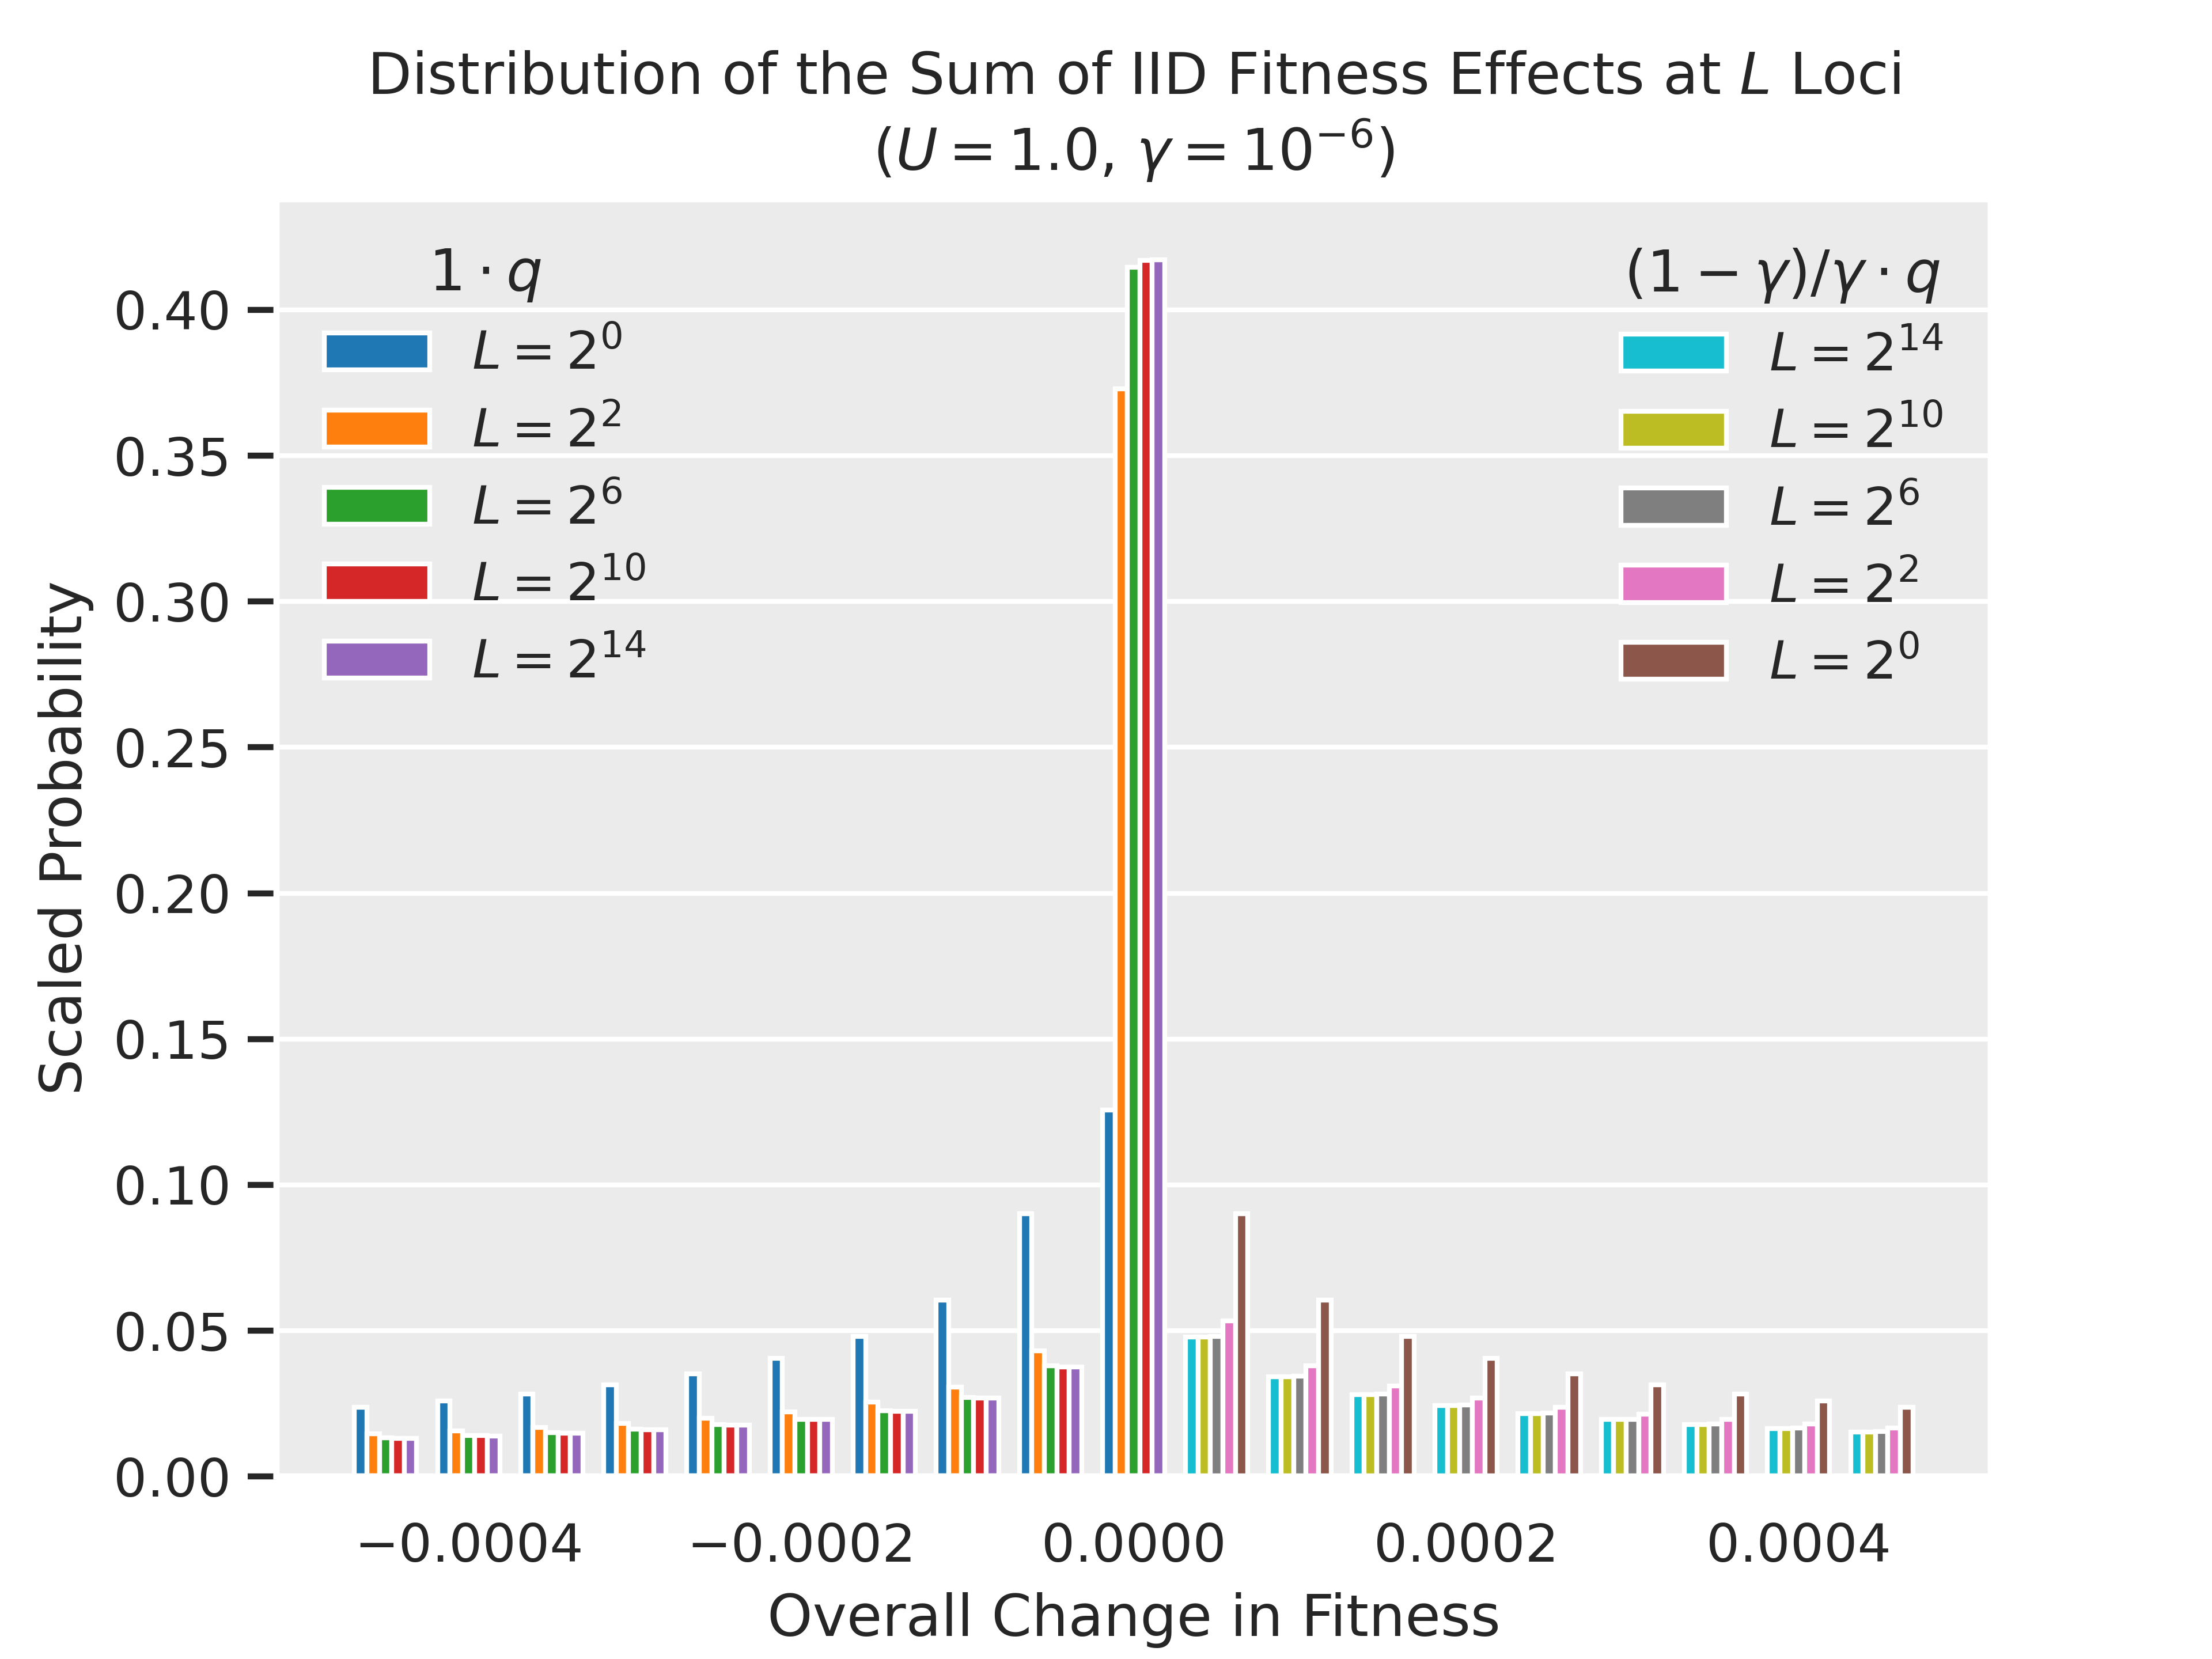

In [9]:
PLOT = SanfordPlot(Q, n=10)
PLOT.save_and_display('tmp.png')

To provide a better view of the shorter bars, we reduce the upper limit on the y-axis to 0.1.

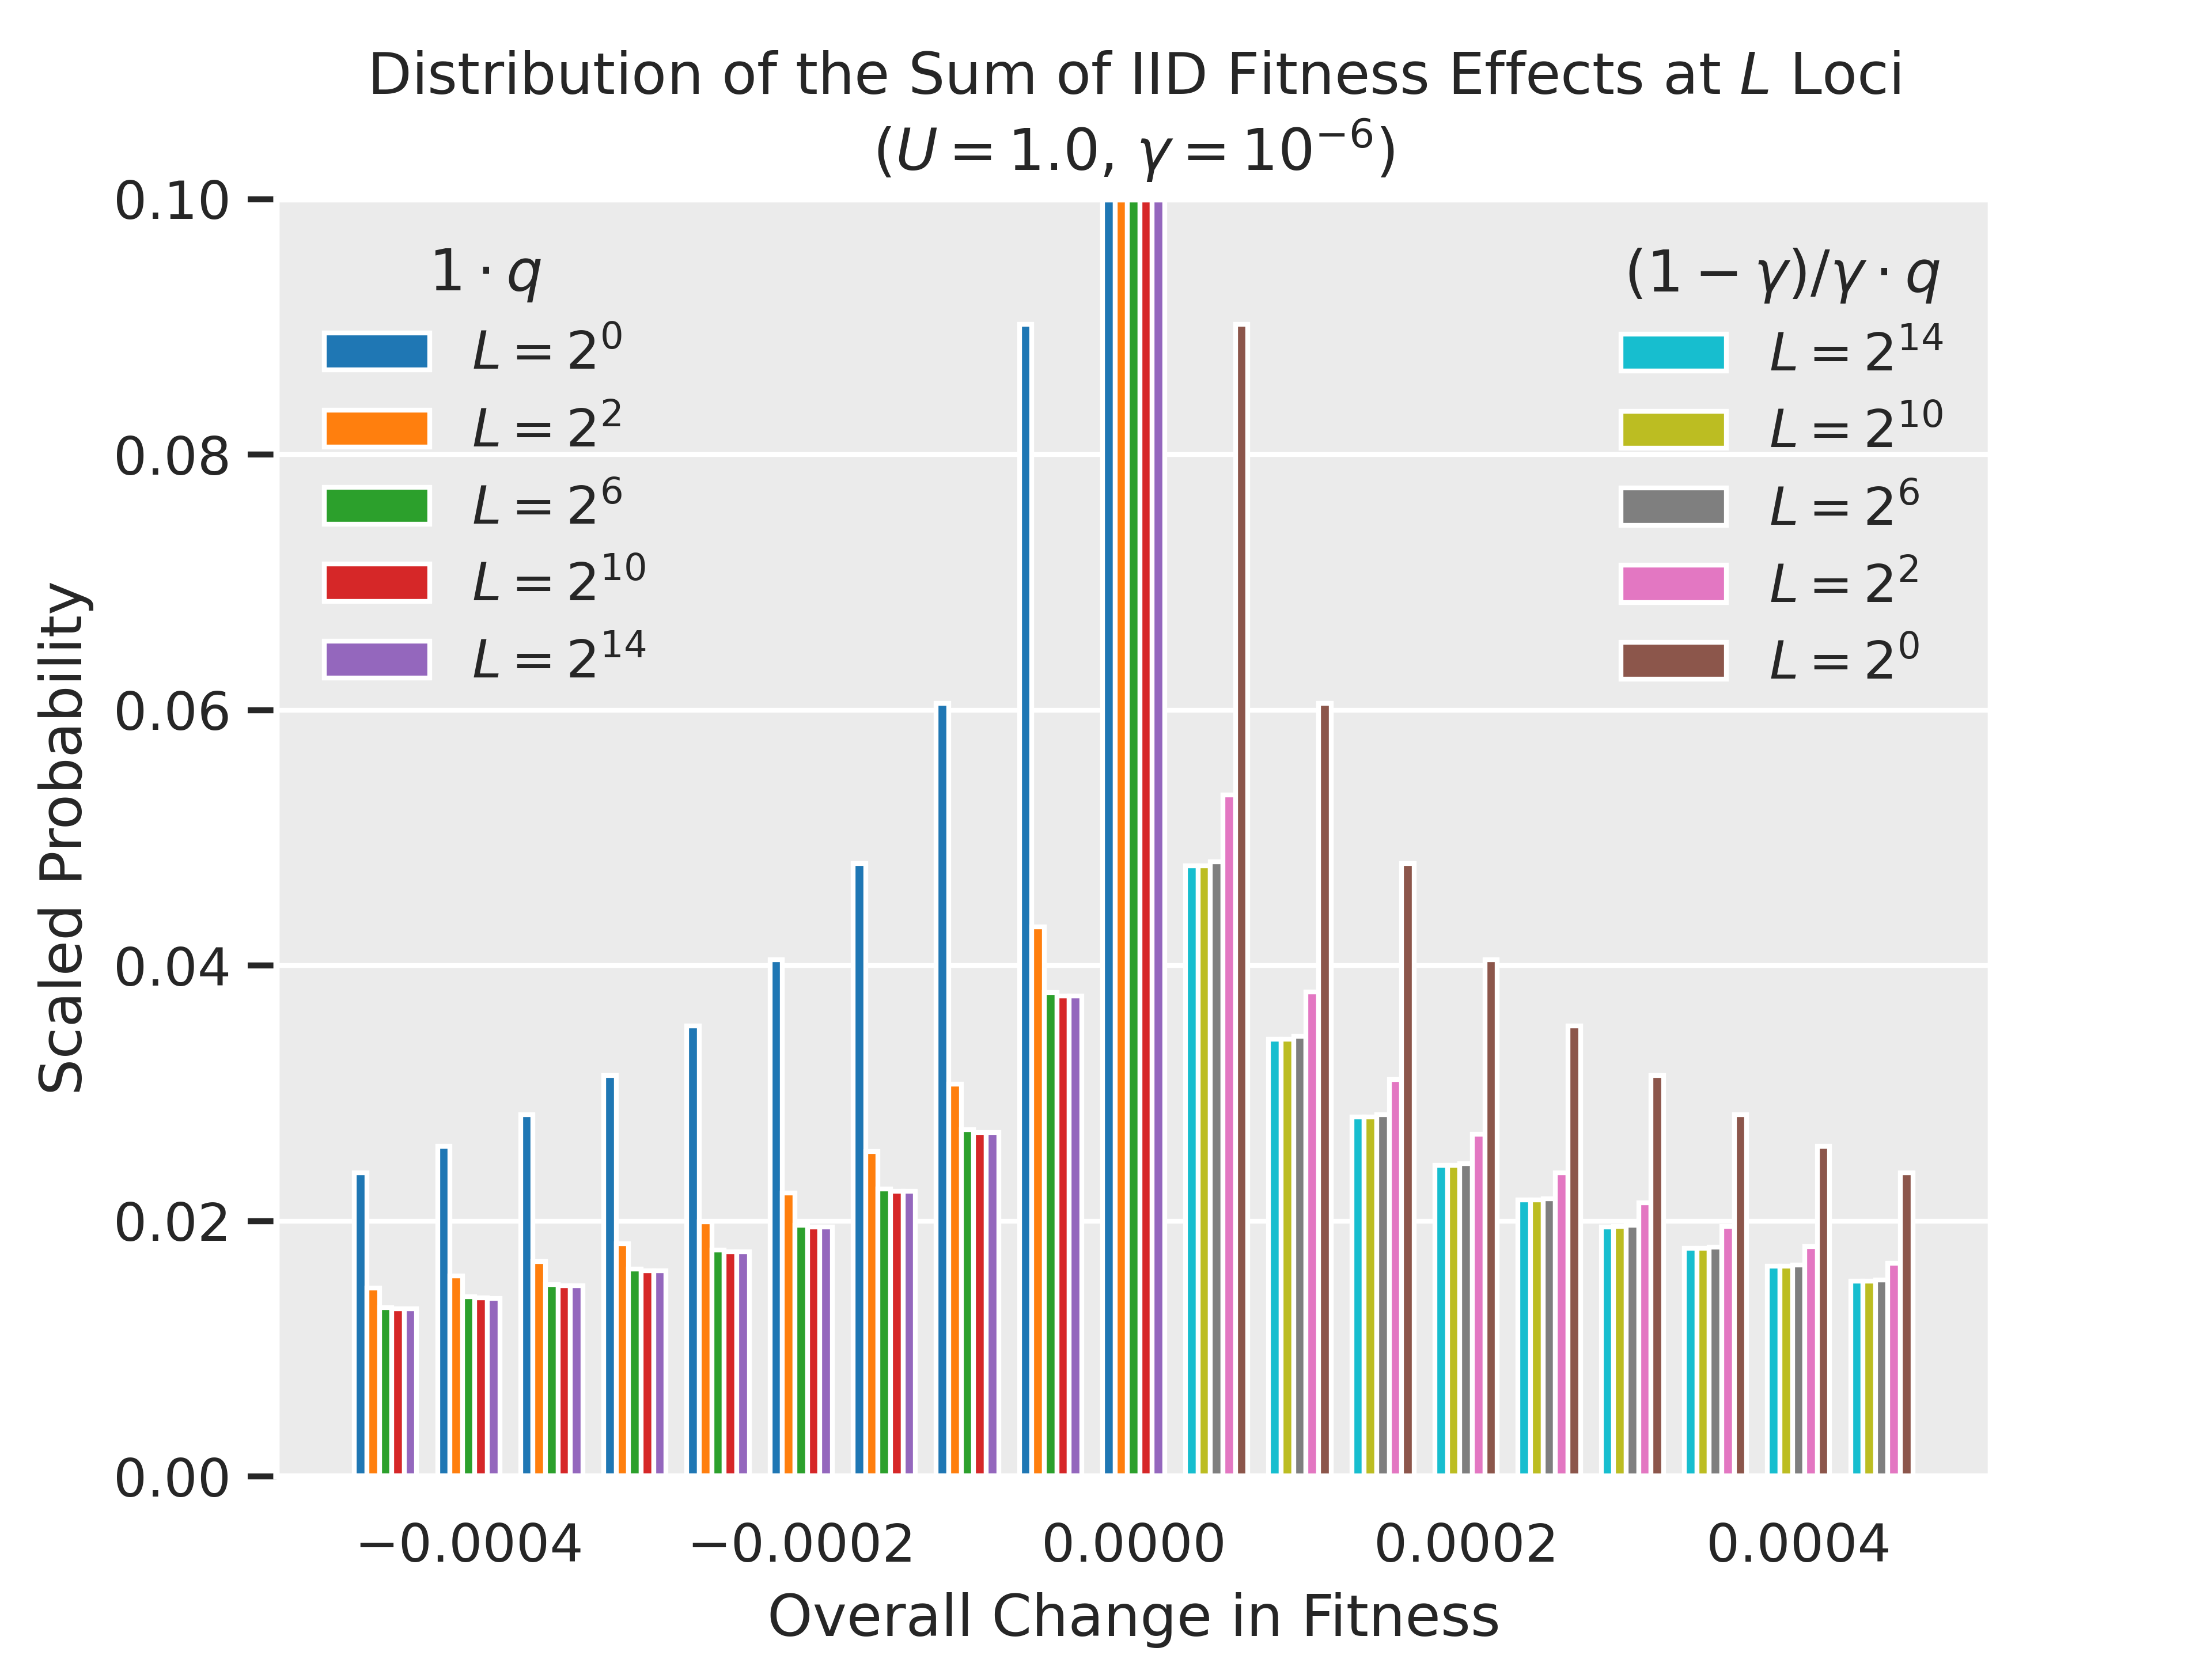

In [10]:
PLOT.set_ylim(0, 0.1)
PLOT.save_and_display('tmp.png')

**The effect of reducing the genomic mutation rate.** We redo the preceding plot for $U=0.1,$ but with the y-axis limit set to 0.01 instead of 0.1.

In [11]:
%%time
Q = get_distributions(log_L=[0, 2, 6, 10, 14], U='0.1')

CPU times: user 15.1 s, sys: 172 ms, total: 15.3 s
Wall time: 6.48 s


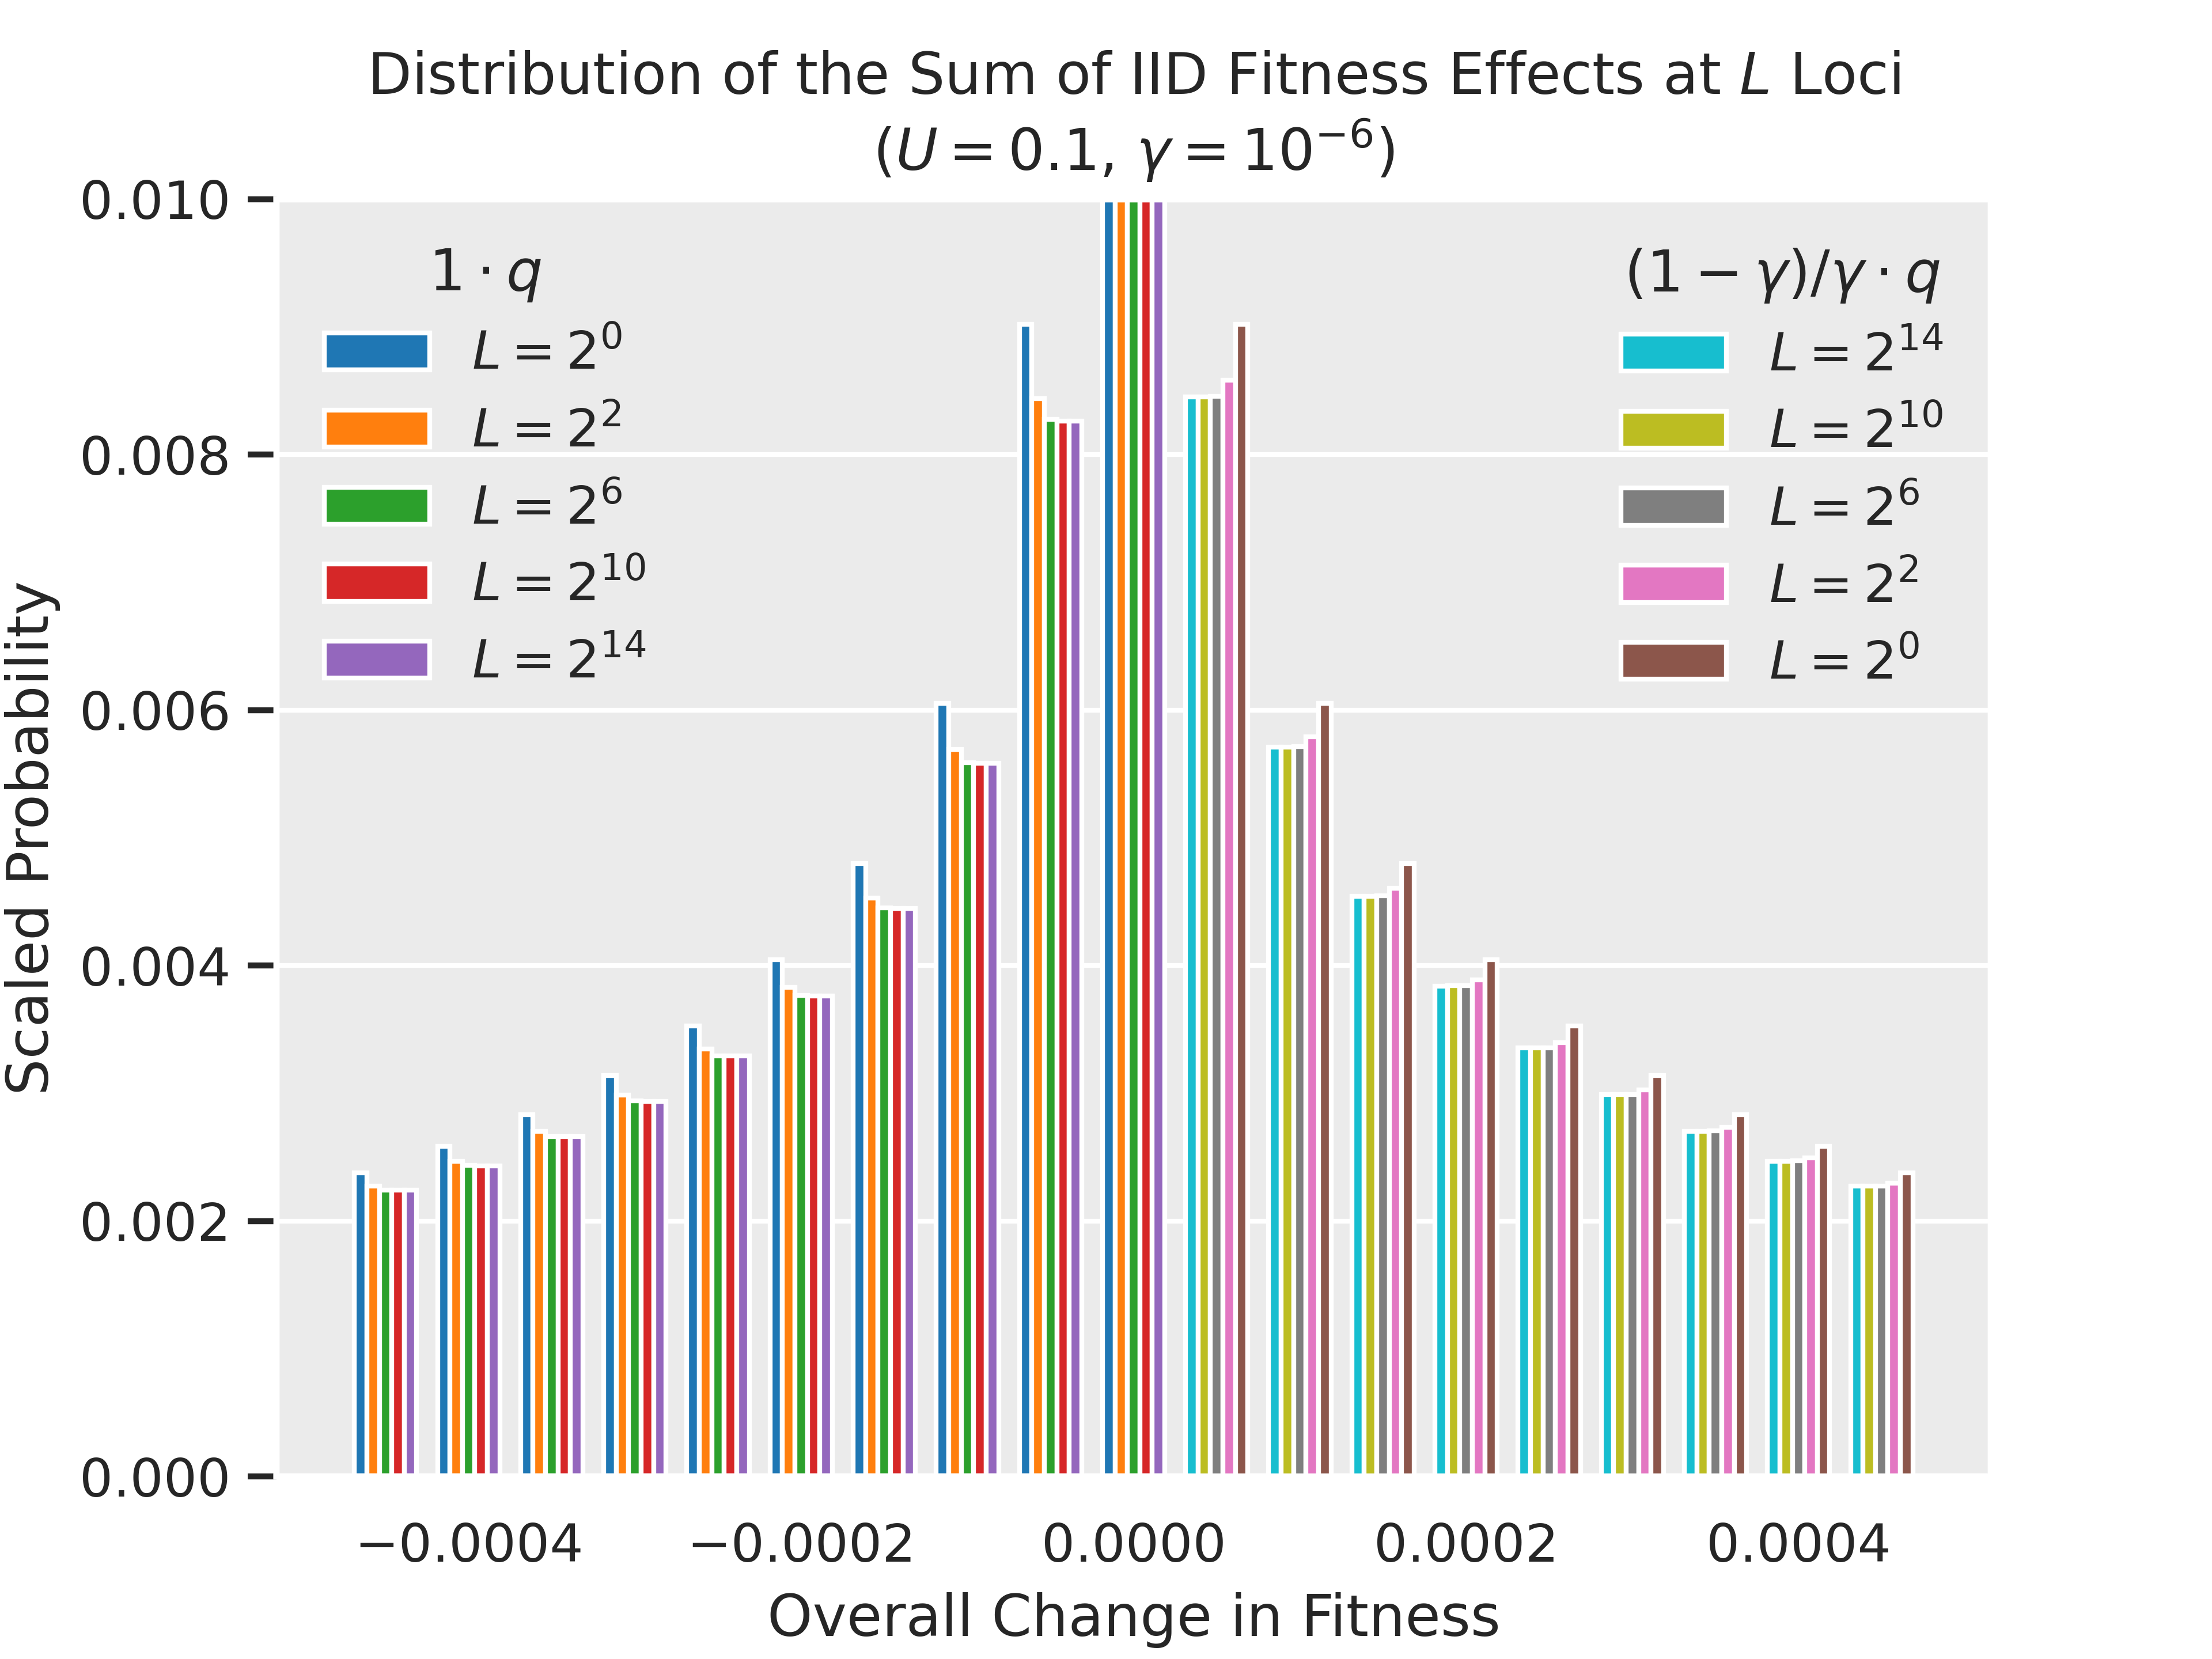

In [12]:
PLOT = SanfordPlot(Q, n=10)
PLOT.set_ylim(0, 0.01)
PLOT.save_and_display('tmp.png')

Next we provide a detailed view of the probabilities of zero overall effect on fitness.

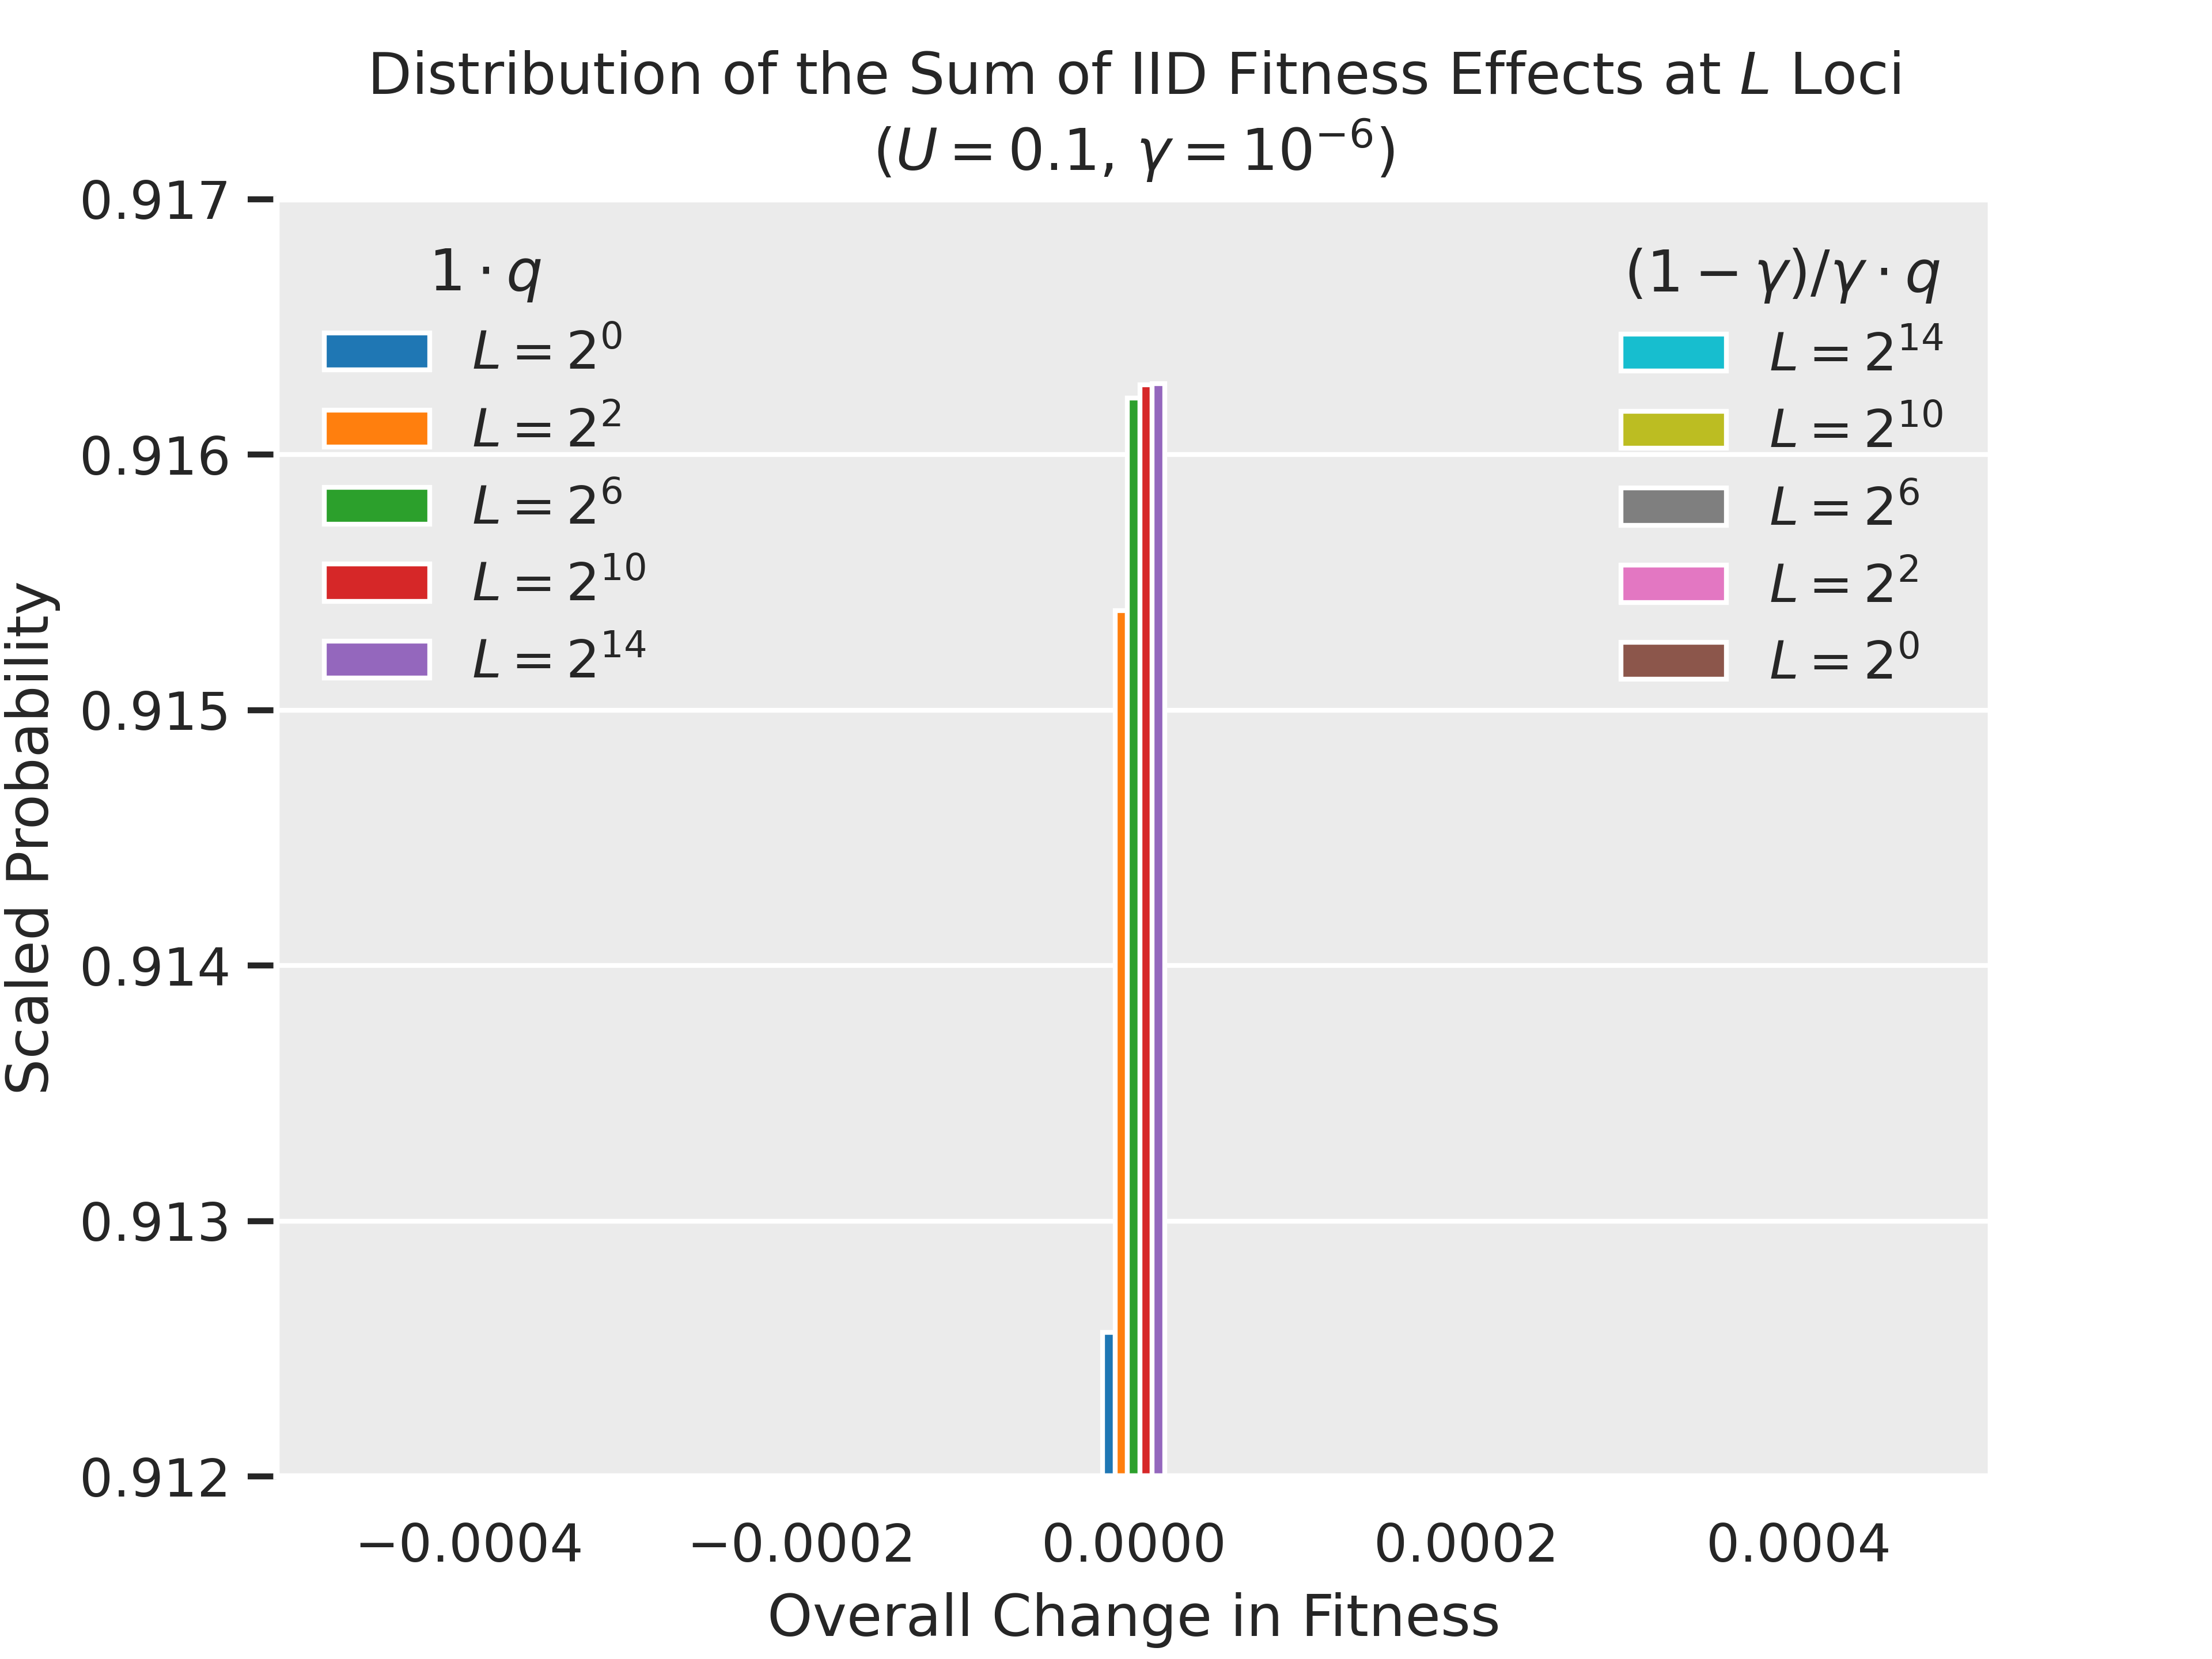

In [13]:
PLOT.set_ylim(0.912, 0.917)
PLOT.save_and_display('tmp.png')

**A "large" number of loci.** We deem the difference in results for $L=2^{10}$ and $L=2^{14}$ to be insubstantial, and henceforth set $L$ no greater than $2^{10}\!.$

# Equilibrium in the original model

We say that the mutation-selection process is at equilibrium when the frequencies of types are unchanging. For the frequency distribution $\mathbf{P}(t)$ to be unchanging, 

$$\mathbf{N}^\prime\!(t) = W \mathbf{N}(t) = \alpha \mathbf{N}(t)$$ 

must hold for some real number $\alpha.$ Then $\mathbf{N}(t)$ is an eigenvector of $W$ associated with eigenvalue $\alpha$ of $W\!,$ by definition of the terms. We refer to a pairing $(\alpha, \mathbf{v})$ of an eigenvalue with an associated eigenvector as an eigenpair of $W\!.$ As a quick review of some elementary results in linear algebra, note that if $(\alpha, \mathbf{v})$ is an eigenpair of $W\!,$ then

- $(\alpha+c, \mathbf{v})$ is an eigenpair of $W + c I$ for all $c,$ and
- $(\alpha, c \mathbf{v})$ is an eigenpair of $W$ for all $c \neq 0.$

Thus $W = A - d I$ and $A$ are identical in their eigenvectors. Also, when $\mathbf{N}^\prime\!(t) = \alpha \mathbf{N}(t),$ the equilibrium distribution $\mathbf{P}(t)$ is an eigenvector of $W$ and $A,$ associated with eigenvalues $\alpha$ and $\alpha + d$ of $W$ and $A,$ respectively. Note that the largest-magnitude eigenvalue of $W$ may be a complex number with a nonzero imaginary component, while the equilibrium distribution is associated with a real eigenvalue.

B&S ([Sect.&nbsp;4](https://doi.org/10.1007/s00285-017-1190-x#Sec12)) claim, incorrectly, that $\mathbf{N}(t)$ is "asymptotic to the eigenvector corresponding to the largest eigenvalue of $W\!.$"
An equivalent claim is that

$$\lim_{t \rightarrow \infty} \mathbf{P}(t) 
   = \mathbf{v}$$
   
holds for the non-negative eigenvector $\mathbf{v},$ $\lVert \mathbf{v} \rVert_1 = 1,$ associated with the largest eigenvalue of $W\!.$ As shown already, the eigenvalue must be real. 
With the stipulation that $\mathbf{v}$ is associated with the largest real eigenvalue, it remains the case that if $\mathbf{P}(t)$ has zero magnitude in the direction of $\mathbf{v}$ at some time $t > 0,$ then the frequency distribution does not converge to $\mathbf{v}.$ We omit analysis, but provide examples relevant to B&S's numerical studies. 

**No mutations.** In the case of no mutation (B&S Sects.&nbsp;5.1&ndash;5.2), the derivative operator is 

$$W = \text{diag}(m_1, m_2, \dotsc, m_n),$$

with eigenvalues $m_1 < m_2 < \dotsc < m_n$ corresponding to the unit vectors $\mathbf{u}_1, \mathbf{u}_2, \dotsc, \mathbf{u}_n,$ respectively. Given the analytic solution $N_i(t) = N_i(0) \, e^{m_i t}\!,$ it is easy to show that $P_k(t)$ converges to unity, i.e., $\mathbf{P}(t) \rightarrow \mathbf{u}_k,$ for the fittest type $k$ with positive initial frequency $N_k(0).$ This observation is salient, inasmuch as B&S set the initial frequencies of the fittest types to zero in all cases. (As explained in our section on [errors and misreporting](#Errors-and-misreporting-in-B&S-Section-5), what B&S report as numerical solutions in the case of no mutation actually were generated by evaluating the analytic solution formula.)

**Mutations.** With mutant births distributed over all types ($f_{ij} > 0$ for all $i,j$), as in B&S's Sects.&nbsp;5.3&ndash;5.4, it is ordinarily the case that at all times $t > 0,$ the frequencies of all types are positive.
Then the frequency distribution converges to the strictly positive eigenvector $\mathbf{v},$ $\lVert \mathbf{v} \rVert_1 = 1,$ associated with the largest real eigenvalue of $W\!$ (proof omitted).
However, in the degenerate case that the initial population is entirely of type $1,$ there are no births ($b_1 = 0$), and $\mathbf{P}(t) = \mathbf{u}_1$ holds for all $t \geq 0.$ That is to say, $(-d, \mathbf{u}_1)$ is an eigenpair of $W\!.$
With $\mathbf{P}(0) = \mathbf{u}_1\!,$ the mutation-selection process (now a death-only process) is at equilibrium from the outset.

**The equilibrium distribution.** For the sake of simplicity, we refer to the non-negative eigenvector $\mathbf{v},$ $\lVert \mathbf{v} \rVert_1 = 1,$ associated with the largest real eigenvalue of $W$ as *the* equilibrium distribution, and to $v_i$ as *the* equilibrium frequency of type&nbsp;$i.$ The tacit assumption is that $P_i(t) > 0$ holds at all times $t > 0$ (perhaps with $\lim_{t\rightarrow \infty} P_i(t) = 0$).

## Calculation of the equilibrium distribution

Our Python method for calculating the equilibrium distribution ([below](#Python-class-Equilibrium)) uses a library routine to obtain a first approximation of the result. Then it invokes a function, defined in the following code cell, to improve upon the approximation by iterating the [inverse power method](https://en.wikipedia.org/wiki/Inverse_iteration). In the iteration, a maximum-absolute-relative-error (MARE) criterion is used to decide whether a new approximation improves upon a previous approximation. When plotting equilibrium distributions ([below](#Plots-of-equilibrium-distributions)) we report the corresponding MARE values.

In [14]:
# %load ./Code/inverse_power.py
def inverse_power(W, e_vector, n_iterations=5):
    """
    Attempts to improve solution `e_vector` for an eigenvector of `W`.
        
    Returns 
    * the eigenvalue corresponding to ...
    * an eigenvector `v` with elements summing to 1, and
    * the maximum absolute error of `e_value * v` relative to `W @ v`.
        
    The given eigenvector is improved (ordinarily) by iterating the
    inverse power method `n_iterations` times.
    """
    e_vector /= fsum(e_vector)
    best_e_vector = e_vector
    best_e_value, best_error = rayleigh_quotient(W, best_e_vector)
    A = np.array(W)
    diag_indices = np.diag_indices(A.shape[0])
    A[diag_indices] -= best_e_value
    #
    # The inverse power method fails (and `solve` raises an exception)
    # when subtraction of the approximate eigenvalue from the main
    # diagonal of `W` produces a singular matrix. Suppress warnings
    # from `solve`: they advise of possible numerical inaccuracy.
    for _ in range(n_iterations):
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            try:
                e_vector = linalg.solve(A, e_vector)
            except:
                break
        e_vector /= fsum(e_vector)
        e_value, error = rayleigh_quotient(W, e_vector)
        if error < best_error:
            best_error = error
            best_e_value = e_value
            best_e_vector = e_vector
            A[diag_indices] = W[diag_indices] - best_e_value
    return best_e_value, best_e_vector, best_error

**MARE definition.** Given approximation $\tilde{\mathbf{v}}$ of the equilibrium distribution $\mathbf{v}$ (a column matrix), the associated eigenvalue is approximated as the Rayleigh quotient:

\begin{equation*}
    \tilde{\alpha} = 
       \frac{ \tilde{\mathbf{v}}^t W \tilde{\mathbf{v}} }
            { \tilde{\mathbf{v}}^t  \tilde{\mathbf{v}} }.
\end{equation*}
       
For the eigenpair $(\alpha, \mathbf{v})$ approximated by $(\tilde{\alpha}, \tilde{\mathbf{v}}),$ the equality $\alpha \:\! v_i = \mathbf{w}_i \mathbf{v}$ holds for all $i.$ ([Recall](#Mutation-selection-model-in-matrix-form) that $\mathbf{w}_i$ is the $i$-th row matrix of $W\!.$) Our measure of error in the approximation is the maximum absolute error of $\tilde{\alpha} \tilde{\mathbf{v}}$ relative to $W \tilde{\mathbf{v}},$

\begin{equation*}
   \text{mare}(\tilde{\alpha} \tilde{\mathbf{v}}, W \tilde{\mathbf{v}})
      = \max_i \left| 
               \frac{\alpha\tilde{v}_i  
                       - \mathbf{w}_i \tilde{\mathbf{v}}}
                    {\mathbf{w}_i \tilde{\mathbf{v}} } 
               \right|,
\end{equation*}

calculated under the assumption that the scalar $\mathbf{w}_i \tilde{\mathbf{v}} \neq 0$ for all $i.$

In [15]:
# %load ./Code/rayleigh_quotient.py
def rayleigh_quotient(W, v):
    """
    Calculate the Rayleigh quotient of square matrix `W` and vector `v`.
    
    Returns
    * the Rayleigh quotient `e_value` (the approximate eigenvalue
      corresponding to approximation `v` of an eigenvector of `W`)
    * the maximum absolute error of `e_value * v` relative to `W @ v`,
      the matrix product of `W` and `v`
    
    The latter value is undefined if any element of `W @ v` is zero.
    """
    # Calculate the vector dot product using the numerically stable
    # `fsum` to sum the elements of the pointwise product of vectors.
    def dot(u, v):
        return math.fsum(u * v)
    #
    # The Rayleigh quotient is (v.T @ W @ v) / (v.T @ v). 
    Wv_product = np.array([dot(row, v) for row in W])
    e_value = dot(v, Wv_product) / dot(v, v)
    #
    # Calculate the maximum absolute relative error, assuming that all
    # elements of `Wv_product` are nonzero. NumPy will issue a warning
    # if any of the elements are zero.
    relative_errors = (e_value * v - Wv_product) / Wv_product
    mare = np.max(np.abs(relative_errors))
    return e_value, mare

## Python class `Equilibrium`

Class `Equilibrium` is defined as a subclass of class `Derivative` (defined [above](#Python-class-Derivative)). On initialization, an instance calculates the equilibrium distribution immediately after calculating the elements of matrix $A.$ Equilibrium frequencies are accessed by indexing the instance.

In [16]:
class Equilibrium(Derivative):
    """
    NEED DESCRIPTION
    """
    def __init__(self, q, n=501, dtype=float, n_iterations=5):
        """
        Calculate the equilibrium distribution.

        A rough approximation, obtained using a library routine, is 
        improved by `n_iterations` of the inverse power method.
        """
        # Negate the elements of the initial eigenvector if the largest-
        # magnitude element is negative. Then zero negative elements.
        super().__init__(q, n, dtype)
        e_value, e_vector = largest_real_eig(self.A.astype(float))
        if e_vector[np.argmax(np.abs(e_vector))] < 0.0:
            e_vector = -e_vector
        e_vector[e_vector < 0.0] = 0.0
        result = inverse_power(self.A, e_vector, n_iterations)
        self.e_value, self.eq, self.mare = result
    
    def __getitem__(self, key):
        return self.eq[key]

## Plots of equilibrium distributions

We plot 2-D grids of equilibrium distributions for various parameter settings. In each figure, the bin width $\Delta$ and number $L$ of loci are held constant.

Python class `Equilibria`, defined in the following cell, stores equilibrium distributions for combinations of weighting $\gamma$ of beneficial mutational effects in Sanford's DFE, maximum birth-rate parameter $b_n,$ and genomic mutation rate $U,$ with $\Delta$ and $L$ held constant across cases.

In [17]:
# %load ./Code/equilibria.py
class Equilibria(object):
    """
    A 3-D array of equilibrium distributions (`Equilibrium` instances).
    
    The dimensions correspond to
    * the weighting of beneficial mutational effects,
    * the upper limit on the birth rate parameter, and
    * the genomic mutation rate.
    
    The bin width and the number of loci are held constant across cases.
    """    
    def __init__(self, delta, log_L, gammas, b_maxes, rates):
        """
        Create array of `Equilibrium` instances.
        
        Parameters
        * `delta`  : bin width (string)
        * `log_L`  : base-2 log of the number of loci (integer)
        * `gammas` : weightings of beneficial mutational effects
        * `b_maxes`: upper limits on the birth rate parameter
        * `rates`  : genomic mutation rates
        """
        self.starttime = datetime.now()
        self.shape = len(gammas), len(b_maxes), len(rates)
        self.eq = np.empty(self.shape, dtype=object)
        self.delta = delta
        self.log_L = int(log_L)
        n_types = to_fraction(b_maxes) / to_fraction(delta) + 1
        assert all(n.denominator == 1 for n in n_types)
        n_types = [n.numerator for n in n_types]
        K = 5 * max(n_types) // 4 + 1
        for i, gamma in enumerate(gammas):
            for k, U in enumerate(rates):
                q = Sanford(K, delta, gamma=gamma, U=U, log_L=log_L)
                for j, n in enumerate(n_types):
                    self.eq[i,j,k] = Equilibrium(q, n)
        self.stoptime = datetime.now()

    def __getitem__(self, key):
        return self.eq[key]
    
    def __iter__(self):
        return self.eq.flat

The ranges of the settings of parameters $\gamma,$ $b_n,$ and $U$ are defined in the following code cell.

In [18]:
GAMMA = ['1e-3', '1e-6', '1e-9']
BMAX = ['0.15', '0.20', '0.25']
RATE = ['1', '0.1']

Python class `EqPlot` (listed in SI 3) generates a figure for a given instance of `Equilibria`. When displaying the figure, it also outputs a textual report of various numbers of interest.

In [19]:
class EqPlot(object):
    """
    Figure comprising a 2-D grid of plots of equilibrium distributions.
    
    Call the `report` instance method to display the distributions and
    print the MARE in their calculations. The title and axis labels are
    attached to subplots. Their placement must be adjusted manually if
    the number of rows (or columns) is even. The subplots are accessed
    by indexing the instance.
    """
    def __init__(self, eqs, d=0.1, lw=2, text_loc=(0.05, 0.25), 
                 legend_loc=(0.05, 0.61), fontsize=9, **kwargs):
        """
        Plots 2-D grid of equilibrium distributions.

        Parameters
        * `eqs`       : an instance of `Equilibria` (wrapping 3-D array)
        * `d`         : death-rate parameter
        * `lw`        : width of lines in plots
        * `text_loc`  : location of mixture-weight text in left subplots
        * `legend_loc`: legend location within the upper right subplot
        * `fontsize`  : font size of text within the subplots
        * `kwargs`    : keyword arguments for `subplots` initializer
        
        Rows of subplots correspond to mixture weights, and columns
        correspond to upper limits on the birth rate parameter. In each
        subplot, there is a curve for each of the mutation rates.
        """
        # Set up an m-by-n grid of subplots corresponding to first two
        # dimensions of the array of equilibrium distributions.
        self.eqs = eqs
        self.d = d
        m, n, k = eqs.shape
        self.L = 2**eqs.log_L
        self.delta = eqs.delta
        self.ax = np.empty((m, n), dtype=object)
        self.fig, self.ax[:] = plt.subplots(m, n, subplot_kw=kwargs,
                                            sharex='col', sharey='row')
        for i in range(m):
            for j in range(n):
                for eq in eqs[i,j]:
                    label = '$U={:3.1f}$'.format(float(eq.q.U))
                    self.ax[i,j].plot(eq.b-d, eq[:], lw=lw, label=label)
            # Display the beneficial effects weight in the leftmost of
            # the subplots in the row.
            gamma = exp_latex(eqs[i,0,0].q.gamma, '\gamma=')
            ax = self.ax[i,0]
            ax.text(*text_loc, gamma, transform=ax.transAxes, bbox=None, 
                    fontsize=fontsize, verticalalignment='top')
        #
        # Place the label of the x-axis (y-axis) with the middle column
        # (row) of the grid. Place the title above the middle column.
        label = '$d=${}'.format(d)
        self.ax[-1,n//2].set_xlabel('Fitness ({})'.format(label))
        self.ax[m//2,0].set_ylabel('Frequency')
        t = 'Equilibrium Distributions for the Mutation-Selection Model'
        self.ax[0,n//2].set_title(t, pad=11, weight='heavy')
        self.fig.tight_layout()
        #
        # Place the legend within the upper right subplot.
        self.ax[0,-1].legend(loc=legend_loc, fontsize=fontsize,
                             frameon=FRAMEON)

    def report(self, filename='tmp.png', freq_format=' {:+8.6f}'):
        """
        Save the figure to a file, and then display it.
        """
        save_and_display(self.fig, filename)
        eqs = self.eqs
        eq = eqs[0,0,0]
        dfe_0 = float(eq.q.dfe[eq.q.k])
        s = 'Corresponding to curves for L={}, delta={}, dfe(0)={:5.3f}'
        print(s.format(self.L, self.delta, dfe_0))
        print('Eigenvalue (mean fitness)')
        e_values = shaped([eq.e_value for eq in eqs], eqs.shape)
        e_values -= self.d
        print3D(e_values, field_format=freq_format)
        print('Frequency of the fittest type')
        mares = shaped([eq[-1] for eq in eqs], eqs.shape)
        print3D(mares, field_format=' {:3.1e}')
        print('MARE in eigenpair calculation')
        mares = shaped([eq.mare for eq in eqs], eqs.shape)
        print3D(mares, field_format=' {:3.1e}')

    def __getitem__(self, key):
        return self.ax[key]

**Results for B&S's (Sect. 5.4) settings of the bin width and the number of loci.** In the following code cells, an array of equilibrium distributions is generated for $\Delta=5 \times 10^{-4}$ and $L=1.$ Then figure containing plots of all of the equilibrium distributions is displayed. As can be seen in the accompanying textual output, the equilibrium frequency of the fittest type is quite small for B&S's settings of $\gamma=10^{-3}\!,$  $b_n=0.25,$ and $U=1.$ But when the genomic mutation rate is reduced to $U=0.1,$ the equilibrium frequency of type $n$ is greater than B&S's setting $\theta=10^{-9}\!$ of the threshold frequency, even with weighting $\gamma = 10^{-9}\!$ of beneficial mutational effects. Note also, in the textual output, that the MARE in all eigenpair calculations is very small.

In [20]:
%%time
DELTA = '5e-4'
LOG_L = 0
EQ = Equilibria(DELTA, LOG_L, GAMMA, BMAX, RATE)

CPU times: user 32 s, sys: 1.18 s, total: 33.2 s
Wall time: 8.54 s


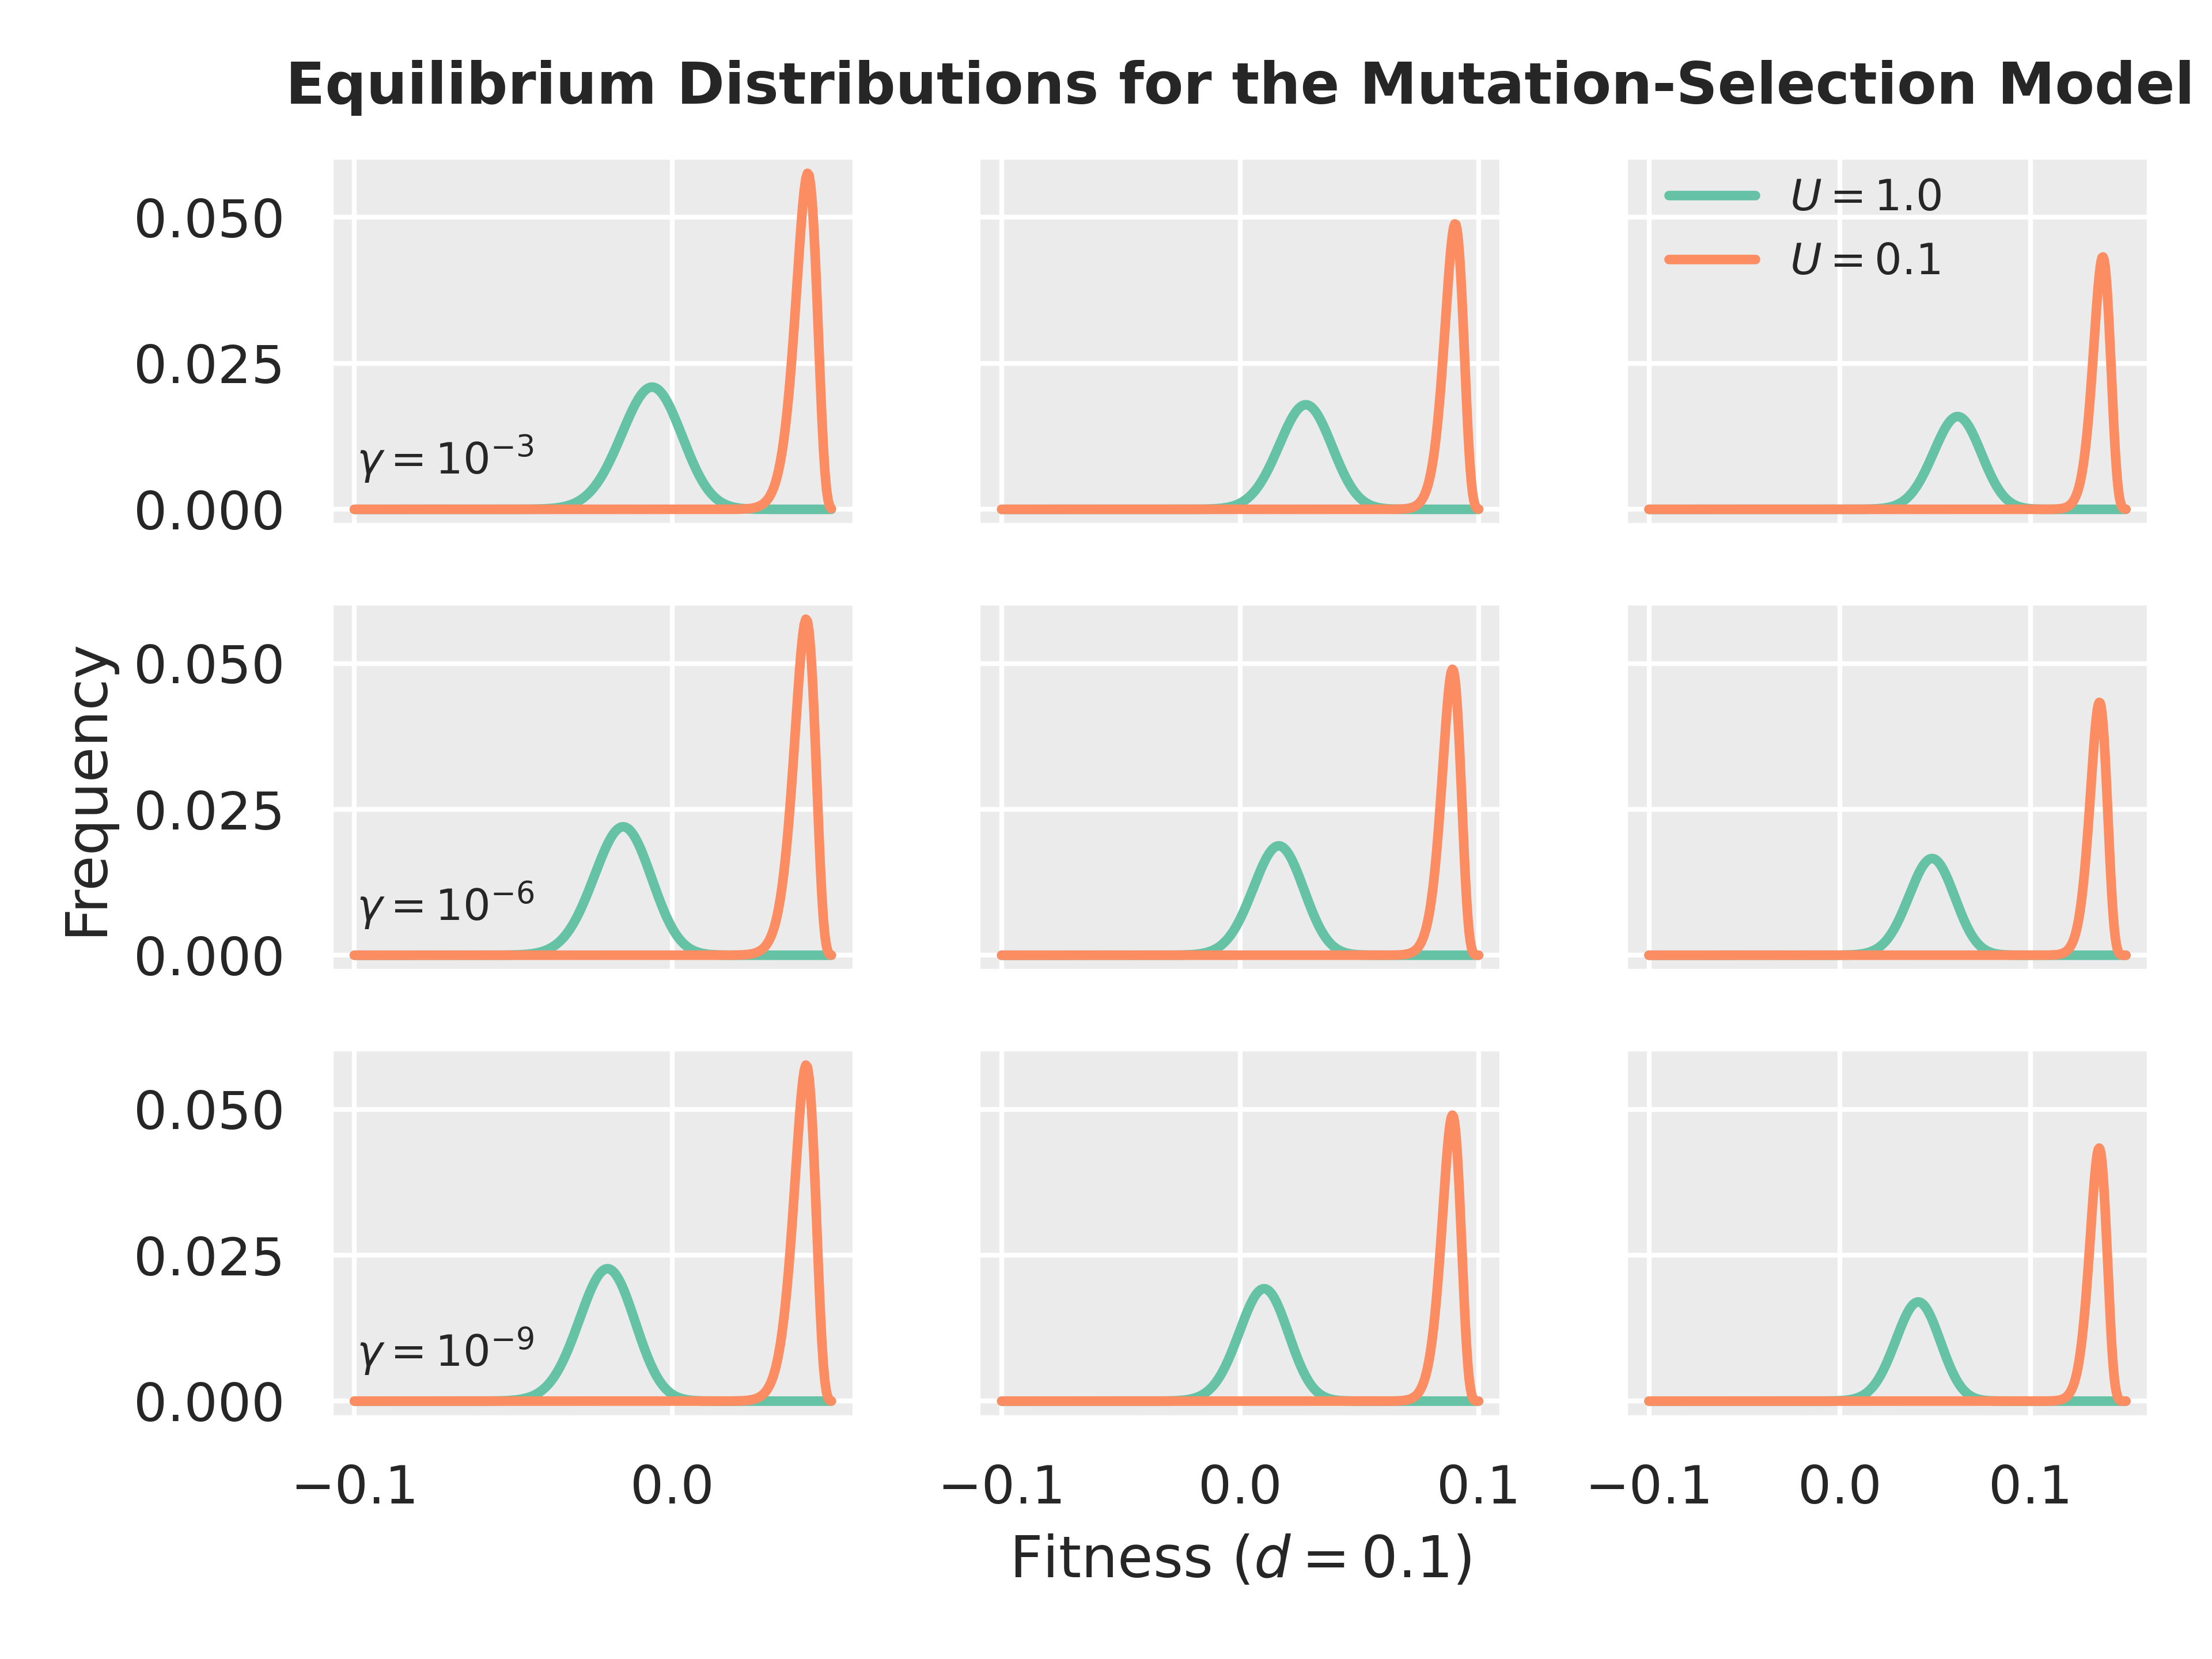

Corresponding to curves for L=1, delta=5e-4, dfe(0)=0.383
Eigenvalue (mean fitness)
   -0.006902 +0.041256   +0.027002 +0.088782   +0.061251 +0.136456
   -0.016004 +0.040746   +0.015654 +0.087688   +0.047839 +0.134753
   -0.020930 +0.040744   +0.009504 +0.087659   +0.040586 +0.134574
Frequency of the fittest type
   1.3e-12 1.3e-04   1.3e-14 2.9e-05   1.7e-16 9.4e-06
   5.3e-18 1.8e-05   1.3e-20 5.6e-07   4.9e-23 3.5e-08
   2.8e-22 1.8e-05   3.2e-25 4.8e-07   5.9e-28 1.3e-08
MARE in eigenpair calculation
   6.3e-16 1.3e-15   5.6e-16 1.3e-15   7.3e-16 2.0e-15
   6.6e-16 1.3e-15   5.7e-16 1.7e-15   7.0e-16 1.3e-15
   6.2e-16 1.4e-15   7.9e-16 1.3e-15   6.6e-16 1.5e-15


In [21]:
EqPlot(EQ).report(filename='tmp.png', freq_format=' {:+8.6f}')

**Results for reduced bin width and increased number of loci.** Now we set $\Delta = 5 \times 10^{-5}\!$ and $L=1024.$ The following code cell either loads previously calculated equilibrium distributions, or redoes the calculations, depending on how the Boolean variable `REDO_EQ` is set. The output of the cell indicates when the calculations were last **done**, and how long the **wait** was for the calculations to complete.

In [22]:
%%time
REDO_EQ = True
DELTA = '5e-4' # 5e-5 for publication
LOG_L = 10
FILENAME = 'EQ_{}_{}'.format(DELTA, LOG_L)

if REDO_EQ:
    EQ = Equilibria(DELTA, LOG_L, GAMMA, BMAX, RATE)
    dump(EQ, FILENAME)
else:
    EQ = load(FILENAME)

Dump 'EQ_5e-4_10' done 2022-08-26 15:53:48.678791 wait 0:00:10.706546
CPU times: user 36.7 s, sys: 1.64 s, total: 38.4 s
Wall time: 11 s


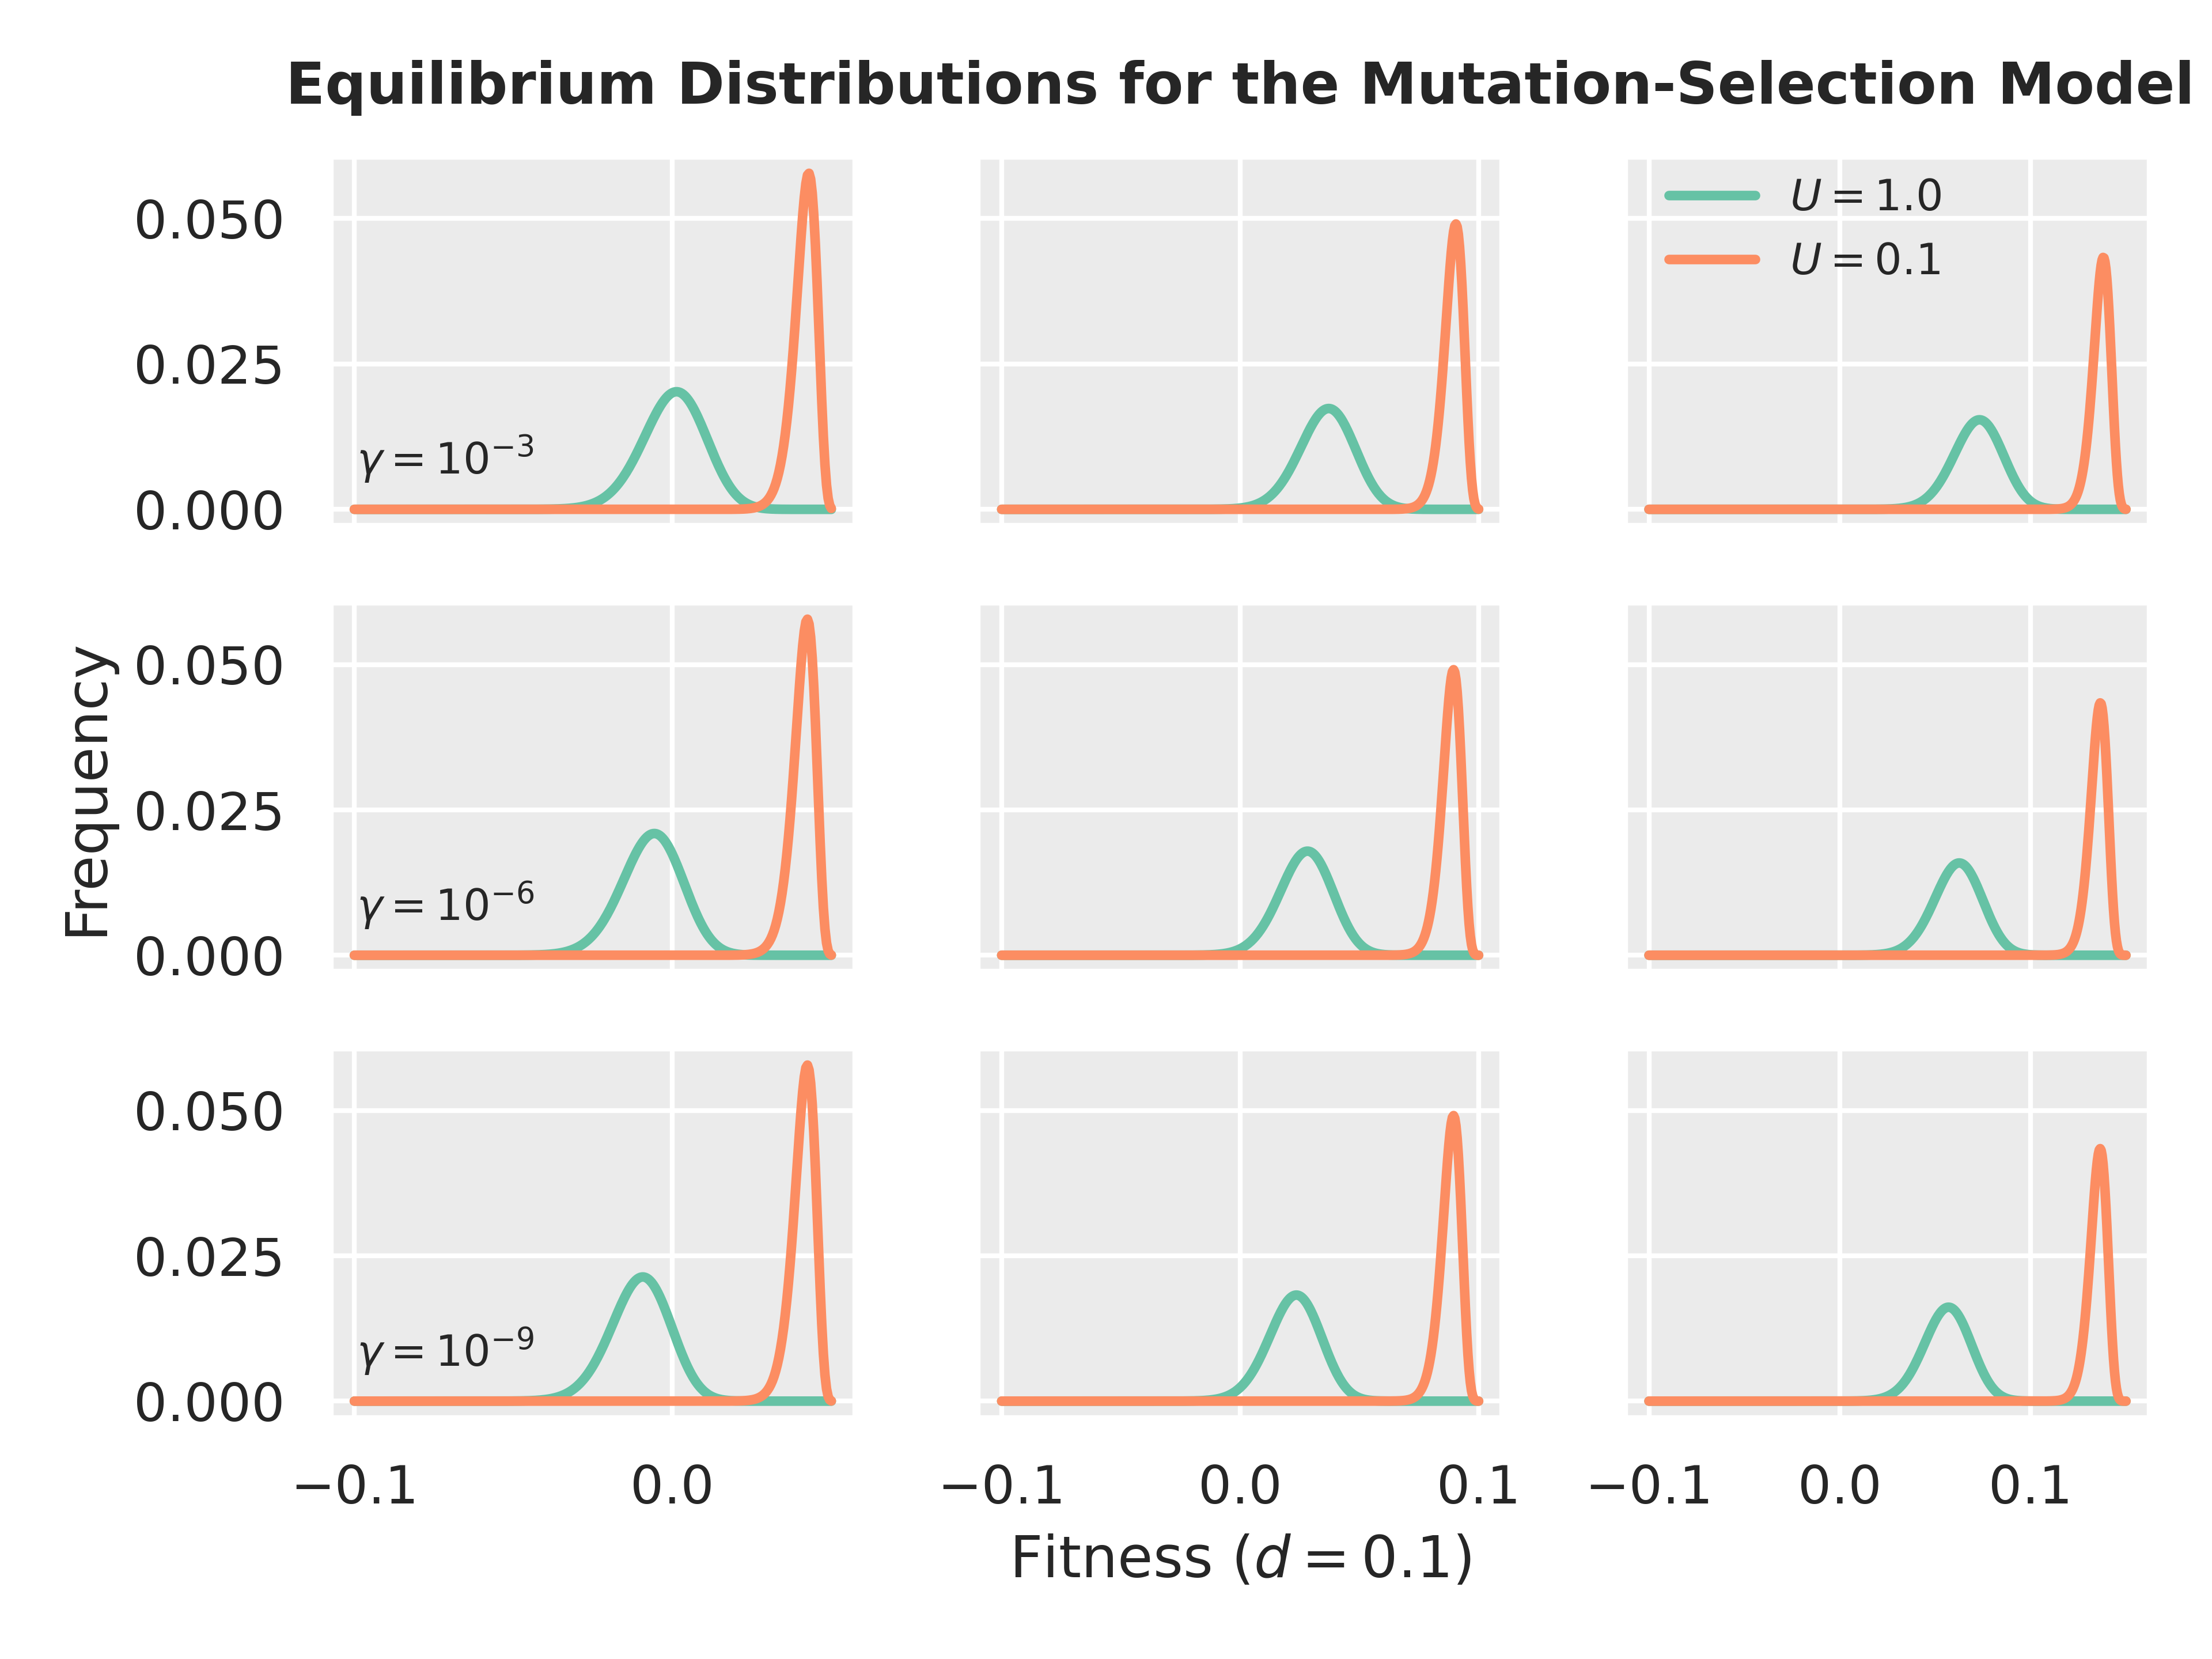

Corresponding to curves for L=1024, delta=5e-4, dfe(0)=0.383
Eigenvalue (mean fitness)
   +0.000287 +0.041461   +0.036083 +0.089020   +0.072195 +0.136724
   -0.006706 +0.041025   +0.027207 +0.088049   +0.061586 +0.135162
   -0.010328 +0.041023   +0.022539 +0.088031   +0.055971 +0.135039
Frequency of the fittest type
   4.5e-11 1.6e-04   8.7e-13 3.6e-05   2.1e-14 1.2e-05
   8.4e-16 3.1e-05   5.0e-18 1.1e-06   4.2e-20 6.2e-08
   1.2e-19 3.1e-05   3.6e-22 9.7e-07   1.7e-24 3.1e-08
MARE in eigenpair calculation
   6.6e-16 1.4e-15   6.8e-16 2.1e-15   8.4e-16 1.3e-15
   6.5e-16 1.0e-15   8.2e-16 1.4e-15   7.6e-16 1.5e-15
   5.9e-16 9.1e-16   6.2e-16 1.3e-15   7.3e-16 1.8e-15


In [23]:
EqPlot(EQ).report(filename='fig1.png', freq_format=' {:+8.6f}')

# Numerical solutions for the extended model

What B&S ([Sect.&nbsp;5](https://doi.org/10.1007/s00285-017-1190-x#Sec13))  mean by *numerical simulation* is a discrete approximation of $\mathbf{N}(t)$ at times $t = 1h,$ $2h,$ $3h, \dotsc,$ with $h > 0,$ given the value of $\mathbf{N}(0).$ We emphasize that the step size $h$ is a parameter of the simulation, determining the accuracy of the approximation, not a parameter of the continuous-time process that is approximated. It bears [repeating](#Modification-of-the-derivative-operator) that B&S state that fitness is "measured in Malthusian growth rate" in their simulations of the extended model, and thus confirm that time is continuous in the modeled system.

## The Euler method

Inspecting the internal script of [Basener's webpage](https://people.rit.edu/wfbsma/evolutionary%20dynamics/EvolutionaryModel.html), we find that in simulations of the original model, it implements the Euler forward method for numerical integration of ordinary differential equations (see E.W. Weisstein, "[Euler Forward Method](https://mathworld.wolfram.com/EulerForwardMethod.html)," *[MathWorld](https://mathworld.wolfram.com/)*).
That is, the algorithm is to initialize with the step

$$\mathbf{s}_0 \leftarrow \mathbf{N}(0),$$

and then iterate the step

$$\mathbf{s}_{k} \leftarrow \mathbf{s}_{k-1} + h \:\! W \mathbf{s}_{k-1}$$

for $k = 1, 2, \dotsc, K.$  The accumulated error in the numerical solution $s_{k,i}$ for $N_i(k\,\! h)$ is $O(h).$  The error in each step $O(h^2).$ 

**Basener's step size is large.** In Basener's script, the step size $h=1$ is unadustable. That is to say, the script simply adds $W \mathbf{s}_{k-1}$ to $\mathbf{s}_{k-1}$ in each iteration.

**Numerical solution in the case of no mutation.** For the case of no mutation, the number of type-$i$ individuals,

$$N_i(h\,k) = N_i(0) e^{m_i h k} = N_i(0) (e^{m_i h})^k ,$$

is approximated as

\begin{align*}
s_{k,i} 
   &= s_{k-1,i} + h \, \mathbf{w}_i \, \mathbf{s}_{k-1} \\
   &= s_{k-1,i} + h \, m_i \, s_{k-1,i} \\
   &= (1 + h m_i) \, s_{k-1,i} \\
   &= s_{0,i} \, (1 + h\, m_i)^k  \\
   &= N_i(0) \, (1 + h\, m_i)^k .
\end{align*}

Note that $1 + m_i h$ is the second-order Maclaurin polynomial approximating $\exp(m_i h).$ We need not know the initial value $N_i(0)$ in order to calculate the ratio of the numerical solution to the analytical solution,

$$ \frac{s_{k,i}}{N_i(k\,h)}
   = \frac{N_i(0) \, (1 + h\, m_i)^k}
          {N_i(0) \, (e^{m_i h})^k} 
   = \left(
        \frac{1 + h\, m_i}{e^{m_i h}}
     \right)^k .
$$

In B&S [Sect. 5.2](https://doi.org/10.1007/s00285-017-1190-x#Sec15), "Simulation with no mutations and a long time-span," the putative simulation runs for $3499$ units of time (arbitrarily dubbed years), and the maximum fitness of any type with nonzero initial frequency is $0.1.$
As shown in the output of the following code cell, the numerical solution for $N_i(3499),$ with $m_i=0.1$ and $h=1,$ is a tiny fraction of the correct value. This is part of what enables us to determine that B&S (Sect.&nbsp;5.2) did not obtain their results by numerical simulation, as they claim, but instead by evaluation of the exact solution formula (see our section on [errors and misreporting](#Errors-and-misreporting-in-B&S-Section-5)).

In [24]:
def solution_ratio(h=1, m=0.1, T=3499):
    K = T/h
    return ((1 + h * m) / math.exp(m*h))**K

def print_ratios(h_exps, m=0.1, T=3499):
    params = '(m={}, T={})'.format(m, T)
    header = 'Ratio of numerical solution to analytic solution {}'
    print(header.format(params))
    for i in h_exps:
        h = 2.0**-i
        h_str = '1/{}'.format(str(int(1/h)))
        ratio = solution_ratio(h, m, T)
        print('h={:7}: {:18.16f}'.format(h_str, ratio))

print_ratios(range(11), m=0.1, T=3499)

Ratio of numerical solution to analytic solution (m=0.1, T=3499)
h=1/1    : 0.0000000747078350
h=1/2    : 0.0002104145043788
h=1/4    : 0.0135388197200347
h=1/8    : 0.1143124031135476
h=1/16   : 0.3365856062279031
h=1/32   : 0.5795041728436802
h=1/64   : 0.7610357390457787
h=1/128  : 0.8723116327616426
h=1/256  : 0.9339596415038476
h=1/512  : 0.9664115762405359
h=1/1024 : 0.9830612523085538


## Inconsistent extension of the Euler method

On a naive reading of B&S (quoted [above](#Introduction)), the algorithm for simulation of the extended model is to initialize with steps

\begin{align*}
   \tilde{\mathbf{s}}_0 
   &\leftarrow 
   \mathbf{N}(0)
   \tag{E0a}
   \\
   \tilde{s}_{0,i}
   &\leftarrow 0 
      \text{ for all } i \text{ such that }
         N_i(0) < \theta \, \lVert  \mathbf{N}(0) \rVert_1 ,
   \tag{E0b}
\end{align*}

and then iterate

\begin{align*}
   \tilde{\mathbf{s}}_{k} 
   &\leftarrow \tilde{\mathbf{s}}_{k-1} 
      + h \:\! W \tilde{\mathbf{s}}_{k-1}
   \tag{E1*} 
   \\
   \tilde{s}_{k,i} 
   &\leftarrow 0 \text{ for all } i \text{ such that } 
         \tilde{s}_{k,i} < \theta \, \lVert \tilde{\mathbf{s}}_k \rVert_1
   \tag{E2} 
\end{align*}

for $k = 1, 2, \dotsc, K.$ This algorithm is implemented by an emended version of Basener's script.

**Errors in Basener's implementation are not features of the algorithm.** The internal script of Basener's simulation webpage

- sets $\tilde{\mathbf{s}}_0 = \mathbf{N}(0),$ i.e., without the zeroing of subthreshold numbers in step (E0b), and 
- puts $\max_i \tilde{s}_{k,i}$ in place of $\lVert \tilde{\mathbf{s}}_k \rVert_1 =$ $\sum_i \tilde{s}_{k,i}$ in the threshold calculation of step (E2).

In so doing, the script plainly violates B&S's (Sect.&nbsp;5, paragraph 2) specification of the modified model. When corrected, the script implements the naive extension of Euler's method.

**The naive extension of Euler's method is inconsistent.** The following theorem shows that when the naive algorithm is sufficiently accurate in its approximation of the extended model, which is to say, when the step size $h$ is sufficiently small, the calculated frequency of a type never rises from zero to threshold. This establishes that the algorithm is self-inconsistent in the derivative calculation $W \tilde{\mathbf{s}}_{k-1}$ of step (E1*), which may associate a positive derivative $\mathbf{w}_i \tilde{\mathbf{s}}_{k-1}$ with $\tilde{s}_{k-1,i} = 0$ when the number of type-$i$ individuals actually does not change.

**Theorem.** Suppose that conditions $\lVert \mathbf{N}(0) \rVert_1 > 0,$ $n \geq 2,$ $m_n \geq 0,$ and $0 < \theta \leq 1/n$ hold in the extended model.
In the $k$-th iteration of step (E2) of the naive algorithm with step size $h < \theta / b_n,$ solution $\tilde{s}_{k,i}$ is set to zero if $\tilde{s}_{k-1,i} = 0.$

**Proof.** 
Assume that $\tilde{s}_{k-1,i}=0$ holds for a particular value of $i.$ In step (E2), $\tilde{s}_{k,i}$ is set to to zero when the calculated frequency of type $i,$ 

\begin{align*}
   \frac{\tilde{s}_{k,i}}
        {\lVert \tilde{\mathbf{s}}_{k} \rVert_1}
   &=
   \frac{0 + h\,\mathbf{w}_i \tilde{\mathbf{s}}_{k-1}}
        {\sum_l \left( 
                    \tilde{s}_{k-1,l} 
                    + 
                    h\,\mathbf{w}_l \tilde{\mathbf{s}}_{k-1}
                 \right)
        }
   \\
   &=
   \frac{h \left( 
              \sum_j f_{ij} b_j \tilde{{s}}_{k-1,j}
              - 
              d \cdot 0
           \right)
        }
        {\lVert \tilde{\mathbf{s}}_{k-1} \rVert_1
         +
         h \sum_l
           \left( 
              \sum_j f_{lj} b_j \tilde{{s}}_{k-1,j}
              - 
              d  \tilde{s}_l
           \right)
        }
   \\
   &=
   \frac{h \sum_j f_{ij} b_j \tilde{{s}}_{k-1,j} }
        {\lVert \tilde{\mathbf{s}}_{k-1} \rVert_1
         +
         h \sum_l
              \sum_j f_{lj} b_j \tilde{{s}}_{k-1,j}
              - 
              h\,d \lVert \tilde{\mathbf{s}}_{k-1} \lVert_1
        }
   \\
   &=
   \frac{h \sum_j f_{ij} b_j \tilde{{s}}_{k-1,j} }
        {(1 - h\,d) \lVert \tilde{\mathbf{s}}_{k-1} \rVert_1
         +
         h \sum_l
              \sum_j f_{lj} b_j \tilde{{s}}_{k-1,j}
        } ,
\end{align*}

is less than the threshold frequency $\theta .$
The frequency of type $i$ is maximized in step (E1*) when 

- the birth rate is maximal, i.e., $\tilde{s}_{k-1,n} = \lVert \tilde{\mathbf{s}}_{k-1} \rVert_1,$ and 
- all births are of type $i,$ i.e., $f_{i,n} = 1.$

That is, the upper bound

\begin{align*}
   \frac{\tilde{s}_{k,i}}
        {\lVert \tilde{\mathbf{s}}_{k} \rVert_1}
   &=
   \frac{h \sum_j f_{ij} b_j \tilde{{s}}_{k-1,j} }
        {(1 - h\,d) \lVert \tilde{\mathbf{s}}_{k-1} \rVert_1
         +
         h \sum_l
              \sum_j f_{lj} b_j \tilde{{s}}_{k-1,j}
        }
   \\
   &\leq
   \frac{h b_n \lVert \tilde{\mathbf{s}}_{k-1} \rVert_1 }
        {(1 - h\,d) \lVert \tilde{\mathbf{s}}_{k-1} \rVert_1
         +
         h b_n \lVert \tilde{\mathbf{s}}_{k-1} \rVert_1
        }
   \\
   &=
   \frac{h b_n }
        {1 + h\,m_n }
\end{align*}

on the calculated frequency is tight. Under the assumptions of $0 < h < \theta / b_n$ and $m_n \geq 0,$ it follows that the calculated frequency of type $i$ is below threshold:

\begin{align*}
   \frac{\tilde{s}_{k,i}}
        {\lVert \tilde{\mathbf{s}}_{k} \rVert_1}
   &\leq
   \frac{h b_n }
        {1 + h\,m_n }
   \\
   &<
   \frac{\theta / b_n \cdot b_n }
        {1 + h\,m_n }
   \\
   &\leq
   \frac{\theta }
        {1 + 0 }
   \\
   &= 
   \theta .
\end{align*}

Thus $\tilde{s}_{k,i}$ is set to zero in step (E2). *QED.*

## Consistent extension of the Euler method

The only logically consistent reading of B&S's description of the modified mutation-selection model is that $N_i(t)$ changes according to the original model as long as $P_i(t) \geq 10^{-9}$ holds, and thereafter assumes a constant value of zero. 
That is, the theorem in the preceding subsection justifies replacement of step (E1\*) with

\begin{equation*}
   \text{for all } i:
   \tilde{s}_{k,i} \leftarrow
      \begin{cases}
         \tilde{s}_{k-1,i} + h \, \mathbf{w}_i \, \tilde{\mathbf{s}}_{k-1} 
            &\text{ if } \tilde{s}_{k-1,i} \geq \theta\, \lVert \tilde{\mathbf{s}}_{k-1} \rVert_1 \\
         0 &\text{ otherwise.}
      \end{cases}
      \tag{E1}
\end{equation*}

This is logically equivalent to setting $\mathbf{w}_i = \mathbf{0}$ when the $i$-th component of the solution falls below threshold.
Note that zeroing the $i$-th row of $W$ changes the fitness $\sum_k w_{kj}$ of type $j$ unless the value of $w_{ij}$ was already zero. In B&S Sects.&nbsp;5.3&ndash;5.4, all elements of $W$ are initially nonzero, and thus $m_j$ is the pseudo-fitness, not the fitness, of type $j$ when one or more rows of $W$ have been zeroed.

## Python classes `Solver` and `NaiveSolver`

The Python class `Solver`, defined in the following code cell, implements the [consistent extension of Euler's method](#Consistent-extension-of-the-Euler-method). Its crucial feature is the `_zero` method, which  zeroes subthreshold solutions for frequencies, and also the corresponding rows of the derivative operator. This makes it impossible for the calculated frequency of a type to change after dropping to zero. An instance is called to calculate end-of-epoch frequencies. Then end-of-epoch frequencies are accessed by indexing the instance.

The subclass `NaiveSolver` of `Solver`, defined at the bottom of the following code cell, differs from `Solver` in only one regard: its `_zero` method zeroes subthreshold frequencies, but *not* the corresponding rows of the derivative operator. Thus the subclass implements the [inconsistent extension of Euler's method](#Inconsistent-extension-of-the-Euler-method).

In [25]:
# %load './Code/solver.py'
class Solver(object):
    """
    A solver for frequencies in the modified mutation-selection model.

    Following initialization, with the step size specified as a fraction
    of an epoch, an instance is called to generate solutions over a
    number of epochs. Solutions for frequencies at whole-number times
    are accessed by indexing the instance, e.g., `d[t]`.
    """ 
    def __init__(self, W, P0, h='1/1024', theta=1e-9):
        """
        Initialize the solver.
        
        Parameters
        `W`    : derivative operator
        `P0`   : initial frequencies of types
        `h`    : size of time steps (string '1/<integer-power-of-2>')
        `theta`: threshold frequency
        
        The solution for time zero is generated by zeroing subthreshold
        frequencies in `P0`, and then normalizing.
        """
        self.W = np.array(W)
        h = exactly(h)
        self.steps_per_epoch = h.denominator
        self.step_size = 2**-int(math.log2(h.denominator))
        assert 1/self.step_size == self.steps_per_epoch
        self.threshold = theta
        #
        # Array `s` always contains the latest solution for unnormalized
        # numbers of individuals for each type, scaled by `2**s_bias` to
        # avoid over(under)flow in calculations. Array `solutions` (2-D)
        # will store the solutions for end-of-epoch frequencies, but
        # initially contains just the solution for initial frequencies.
        self.s = np.array(P0)
        self.max_exponent = 510 - math.ceil(math.log2(len(self.s)))
        self.s_bias = bias_exponents(self.s, self.max_exponent)
        self.solutions = np.empty((1, len(self.s)))
        self._zero()
        self.solutions[0] = self.s / fsum(self.s)
        self.n_solutions = 1
        
    def __call__(self, n_epochs=1000):
        """
        Solve for `n_epochs` end-of-epoch frequencies.
        """
        # In each epoch, perform `steps_per_epoch` numerical integration
        # steps, zeroing subthreshold components and their derivatives.
        # At the end of the epoch, bias exponents of numbers in the
        # solution `s` to avoid over(under)flow in ensuing calculations,
        # and store the solution for end-of-epoch frequencies.
        self._extend_solutions(n_epochs)
        for _ in range(n_epochs):
            for _ in range(self.steps_per_epoch):
                self.s += self.step_size * (self.W @ self.s)
                if self.threshold > 0:
                    self._zero()
            self.s_bias += bias_exponents(self.s, self.max_exponent)
            self.solutions[self.n_solutions] = self.s / fsum(self.s)
            self.n_solutions += 1
        
    def _zero(self):
        """
        Zeroes subthreshold frequencies and their derivatives.
        """
        # Using Boolean indexing, zero rows of `W` corresponding to
        # zeroed frequencies.
        zeroed = self._zero_subthreshold_frequencies()
        self.W[zeroed,:] = 0.0

    def _zero_subthreshold_frequencies(self):
        """
        Zeroes calculated frequencies less than the threshold value.
        
        Returns a Boolean array indicating which frequencies are zero.
        """
        # Determine which calculated frequencies are below threshold.
        # Using Boolean indexing, zero the subthreshold elements of `s`.
        subthreshold = self.s < self.threshold * self.s.sum()
        self.s[subthreshold] = 0.0
        return subthreshold

    def _extend_solutions(self, n):
        # Allocate storage for solutions for an additional `n` epochs.
        rows, cols = self.solutions.shape
        new = np.empty((rows+n, cols))
        new[:rows] = self.solutions
        self.solutions = new

    def __getitem__(self, key):
        # Indexes end-of-epoch `solutions` by `key`.
        return self.solutions[key]

    def __len__(self):
        # Returns the number of end-of-epoch solutions.
        return len(self.solutions)

        
class NaiveSolver(Solver):
    """
    Implements a solver based on a naive reading of Basener and Sanford.
    """
    def _zero(self):
        """
        Zero subthreshold frequencies, but NOT THEIR DERIVATIVES.
        """
        self._zero_subthreshold_frequencies()

## Solutions for the case of no mutation

Contrary to what they claim, B&S do not present simulation results (numerical solutions) in their [Sect. 5.1](https://doi.org/10.1007/s00285-017-1190-x#Sec14), "Simulation with no mutations and a short time-span," and [Sect. 5.2](https://doi.org/10.1007/s00285-017-1190-x#Sec15), "Simulation with no mutations and a long time-span." They instead present results of evaluating the exact solution formula 

\begin{equation*}
   P_i(t) 
   = \frac{N_i(t)}
          {\sum_j N_j(t)} 
   = \frac{N_i(0)\, e^{m_i t}}
          {\sum_j N_j(0)\, e^{m_j t}}
\end{equation*}

for the *original* model — an option provided by Basener's [simulation webpage](https://people.rit.edu/wfbsma/evolutionary%20dynamics/EvolutionaryModel.html). Furthermore, the results were not generated using the current version of the webpage, which sets the range of fitnesses differently than specified by B&S.
Here we replicate the results (in the 14 most-significant digits) produced by the webpage when the following line of its script is modified:
```Javascript
var fitnessRange = [-0.1, 0.15];
```
The fitness range is $[-0.05, 0.15]$ in B&S Sects.&nbsp;5.1&ndash;5.2.

As shown in the following, substantial errors accumulate rapidly in the webpage's numerical solutions for frequencies, obtained using Euler's method with (unadjustable) step size $h=1.$ Thus it is clear that B&S have reported values of the exact solution formula in place of highly erroneous numerical solutions.

**Replicating parameter settings.** The function defined in the following cell returns values of $N_i(0)$ and $m_i,$ $i = 1,$ $2, \dotsc, n,$ that are almost exactly the values generated by Basener's script. $\mathbf{N}(0)$ is nominally a (discretized) Gaussian distribution with mean $0.044$ and standard deviation $0.005,$ but with the tails extending only $11.2$ standard deviations from the mean. However, in the calculations of the script, the endpoint of one or the other tail is excluded (the corresponding frequency is wrongly set to zero), due to numerical roundoff errors. This means that results may differ substantially for seemingly equivalent parameter settings.

In [26]:
# %load ./Code/basener_init.py
def basener_init(n, m_lim=[-0.1, 0.15], mean=0.044, std=0.005):
    """
    Return initial frequencies and fitnesses calculated as by Basener.
    
    Parameters
    `n`    : number of types, set 1 greater than by Basener
    `m_lim`: [lower, upper] limits on fitness. Basener excludes the
             upper limit, but it is included here for convenience
    `mean` : mean of the normal distribution discretized to obtain
             initial frequencies of types
    `std`  : standard deviation of the normal distribution
    """
    delta = (m_lim[1] - m_lim[0]) / (n - 1)
    m = delta * np.arange(float(n)) + m_lim[0]
    p = np.exp(-0.5 * ((m - mean) / std)**2)
    p[abs(m - mean) > 11.2 * std] = 0
    p /= math.fsum(p)
    return p, m, delta

The following code cell shows that the support of the initial frequency distribution (the range of fitnesses for which the initial frequencies are positive) actually differs for theoretically equivalent parameter settings. To put it concretely, the cell shows why it is impossible to replicate B&S's (Sects.&nbsp;5.1&ndash;5.2) results using the current version of Basener's webpage. Note that the number of types is set greater $(+1)$ than when using the webpage. The reason is that the webpage excludes the upper endpoint of the fitness range $(m_n =$ $0.15 - \Delta),$ while our code includes it.

In [27]:
def initial_support(n, fitnessRange=[-0.1, 0.15], t=3500):
    p0, m, delta = basener_init(n, fitnessRange)
    support = m[p0 > 0]
    a, b = support[[0,-1]]
    print('Number of types: {}+1'.format(n-1))
    print('Fitness range  : [{}, {}]'.format(m[0], m[n-1]))
    print('Support range  : [{}, {}]'.format(a, b))
    print('Delta          : {}'.format(delta))

initial_support(501, [-0.05, 0.15], t=3500)
print()
initial_support(626, [-0.10, 0.15], t=3500)

Number of types: 500+1
Fitness range  : [-0.05, 0.15000000000000002]
Support range  : [-0.0116, 0.09999999999999999]
Delta          : 0.0004

Number of types: 625+1
Fitness range  : [-0.1, 0.15]
Support range  : [-0.011999999999999997, 0.0996]
Delta          : 0.0004


**Many of the positive initial frequencies are below threshold.** B&S's (Sect.&nbsp;5) specification of the initial frequency distribution (3rd paragraph) is inconsistent with their prior stipulation that frequencies are set to zero whenever they fall below $10^{-9}\!$ (2nd paragraph). As shown in the following plot, the tails of the initial distribution are severely cropped when subthreshold frequencies are set to zero, even with the miscalculation of the threshold as $10^{-9} \max_i P_i(t)$ by Basener's script. In the absence of mutation, the frequency of a type remains zero forever if it is initially zero. It is easy to see in the figures of B&S Sect.&nbsp;5.2 that the initial frequency of the type with fitness $0.10$ is positive. Thus there is no doubt that the results are for the original model $(\theta=0).$ <span style='color:red;'>WEAK.</span>

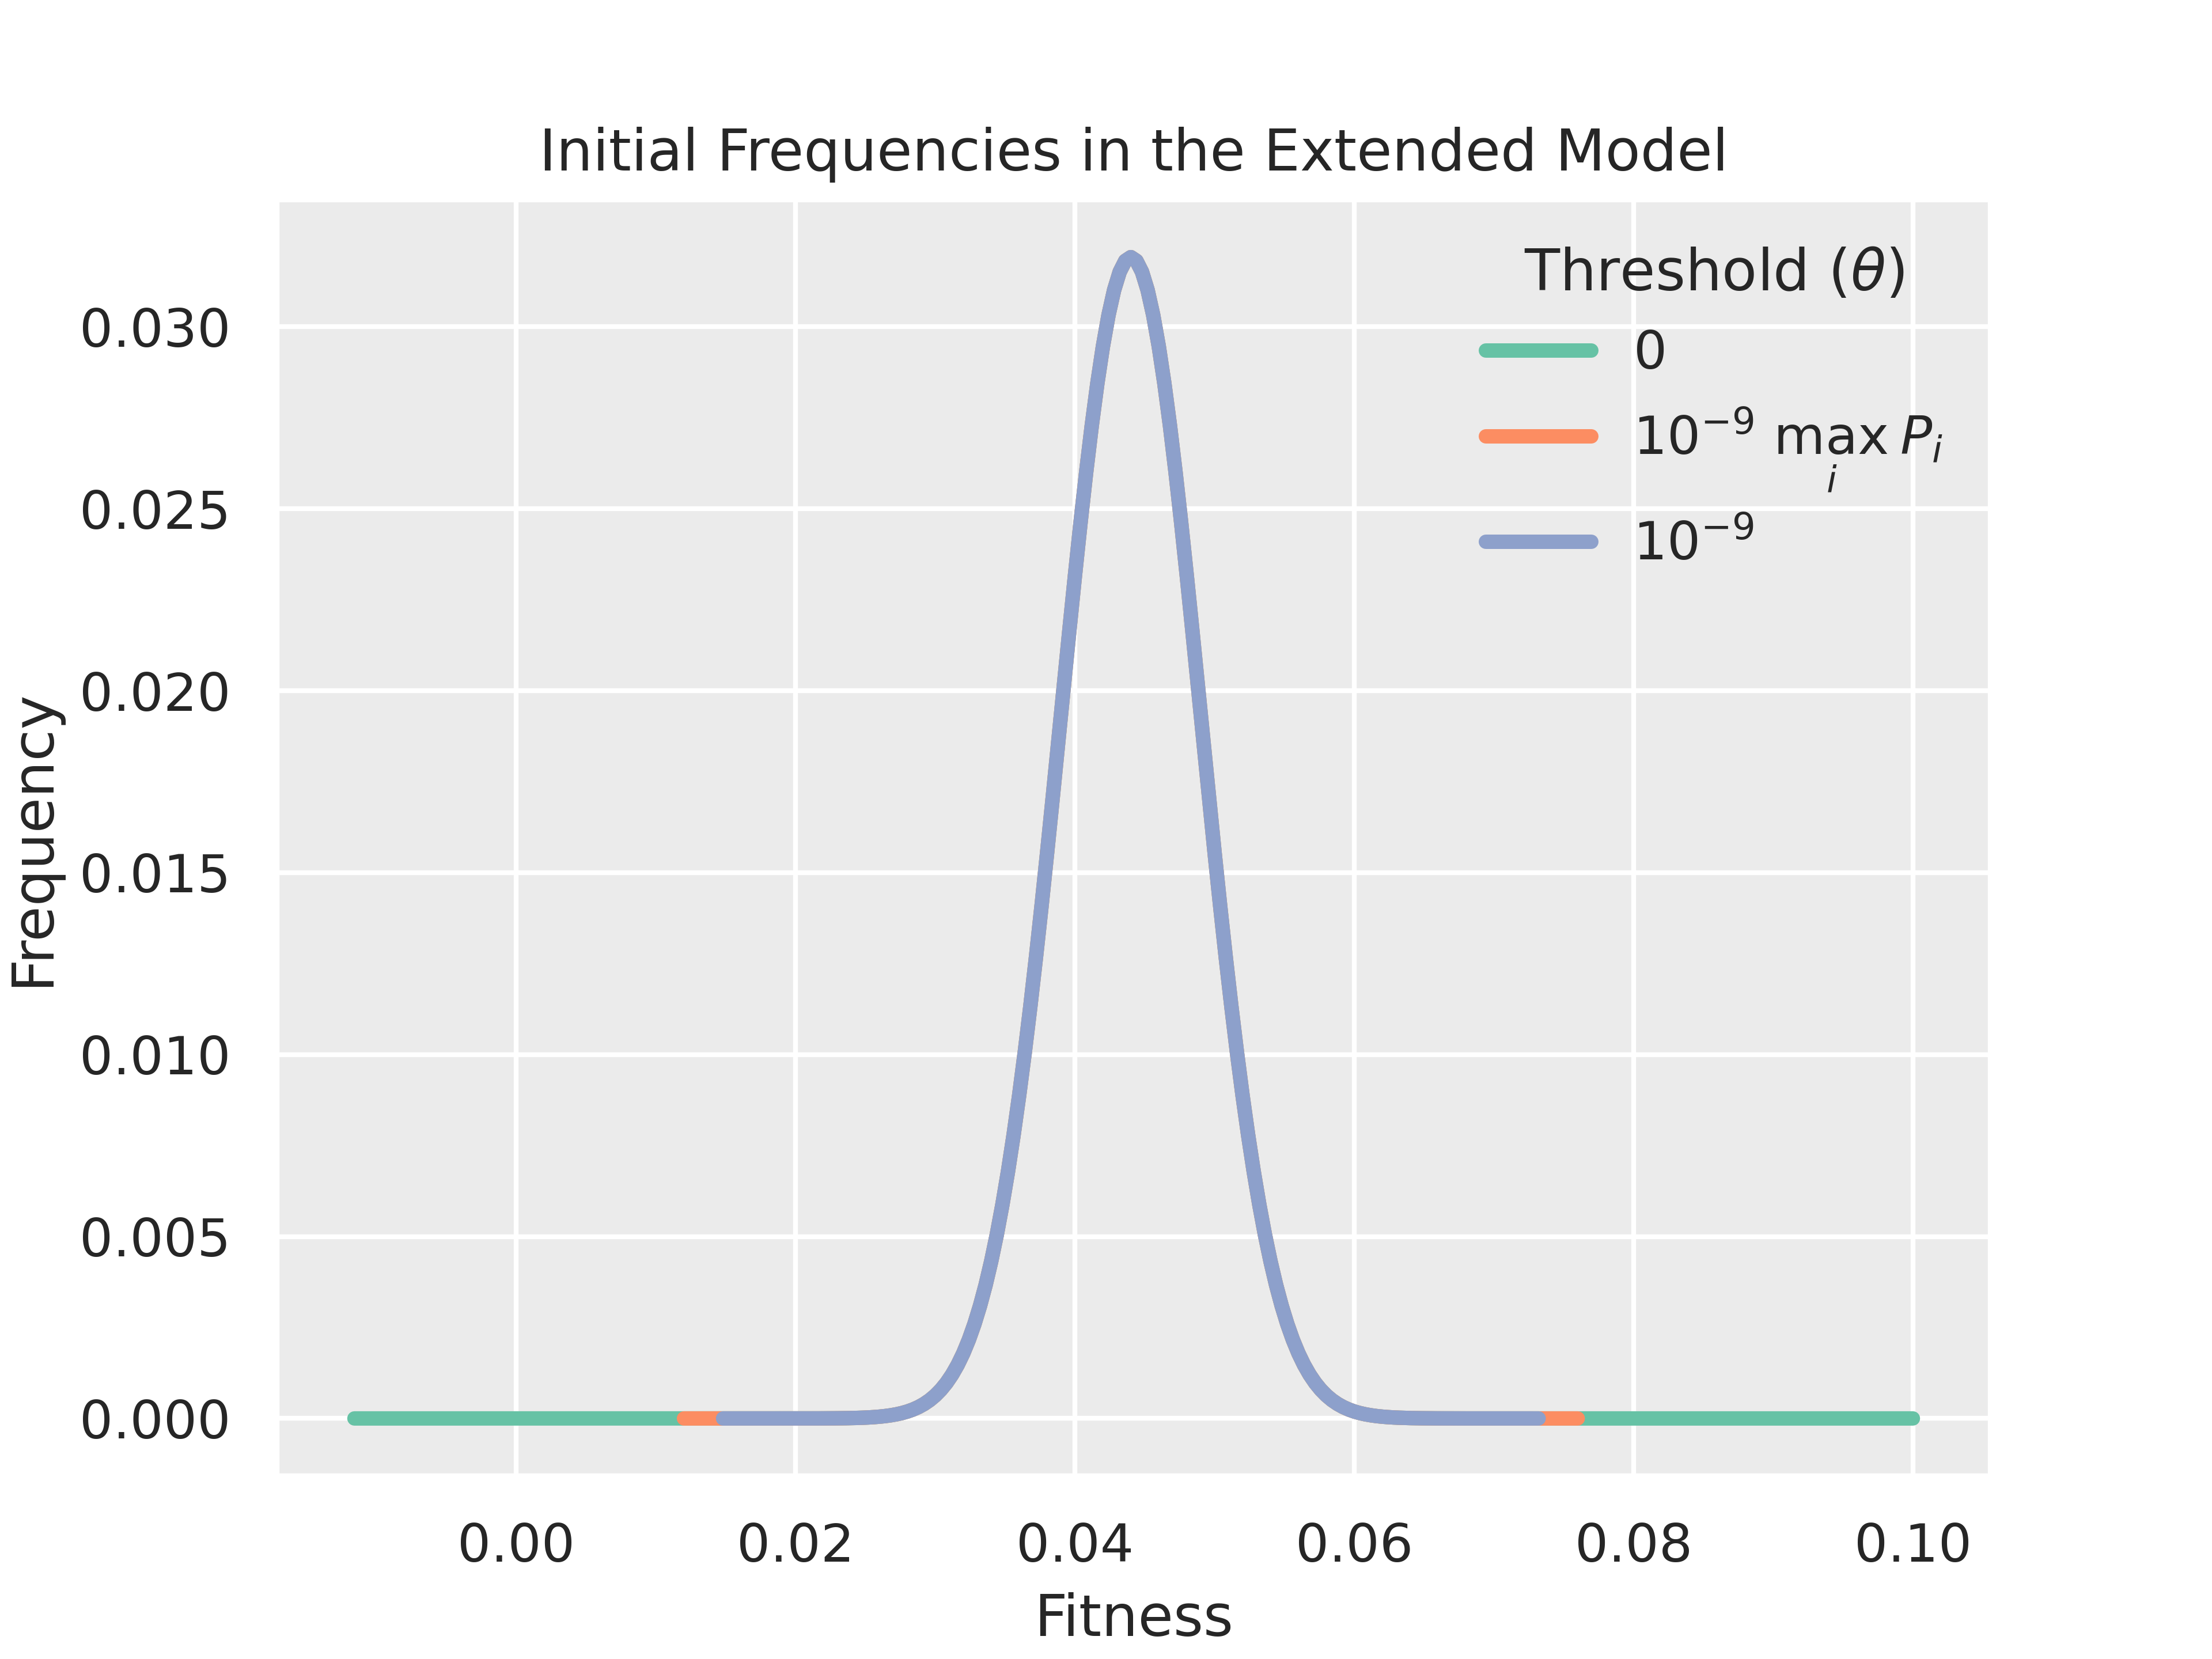

In [28]:
def compare_cropping(n=501, m_lim=[-0.05, 0.15]):
    p, m, delta = basener_init(n, m_lim)
    ax = add_curve(m, p, label='$0$')
    lab = exp_latex(1e-9, base=10)
    lab = '{} $\\max_i\\: P_i$'.format(lab)
    ax = add_curve(m, p, threshold=1e-9*max(p), ax=ax, ls='-',
                   label=lab)
    lab = exp_latex(1e-9, base=10)
    ax = add_curve(m, p, threshold=1e-9, ax=ax, ls='-',
                   label=lab)
    ax.set_title('Initial Frequencies in the Extended Model')
    ax.legend(title='Threshold ($\\theta$)', loc='best', frameon=FRAMEON)
    save_and_display(ax.get_figure(), 'tmp.png')
    return ax

compare_cropping();

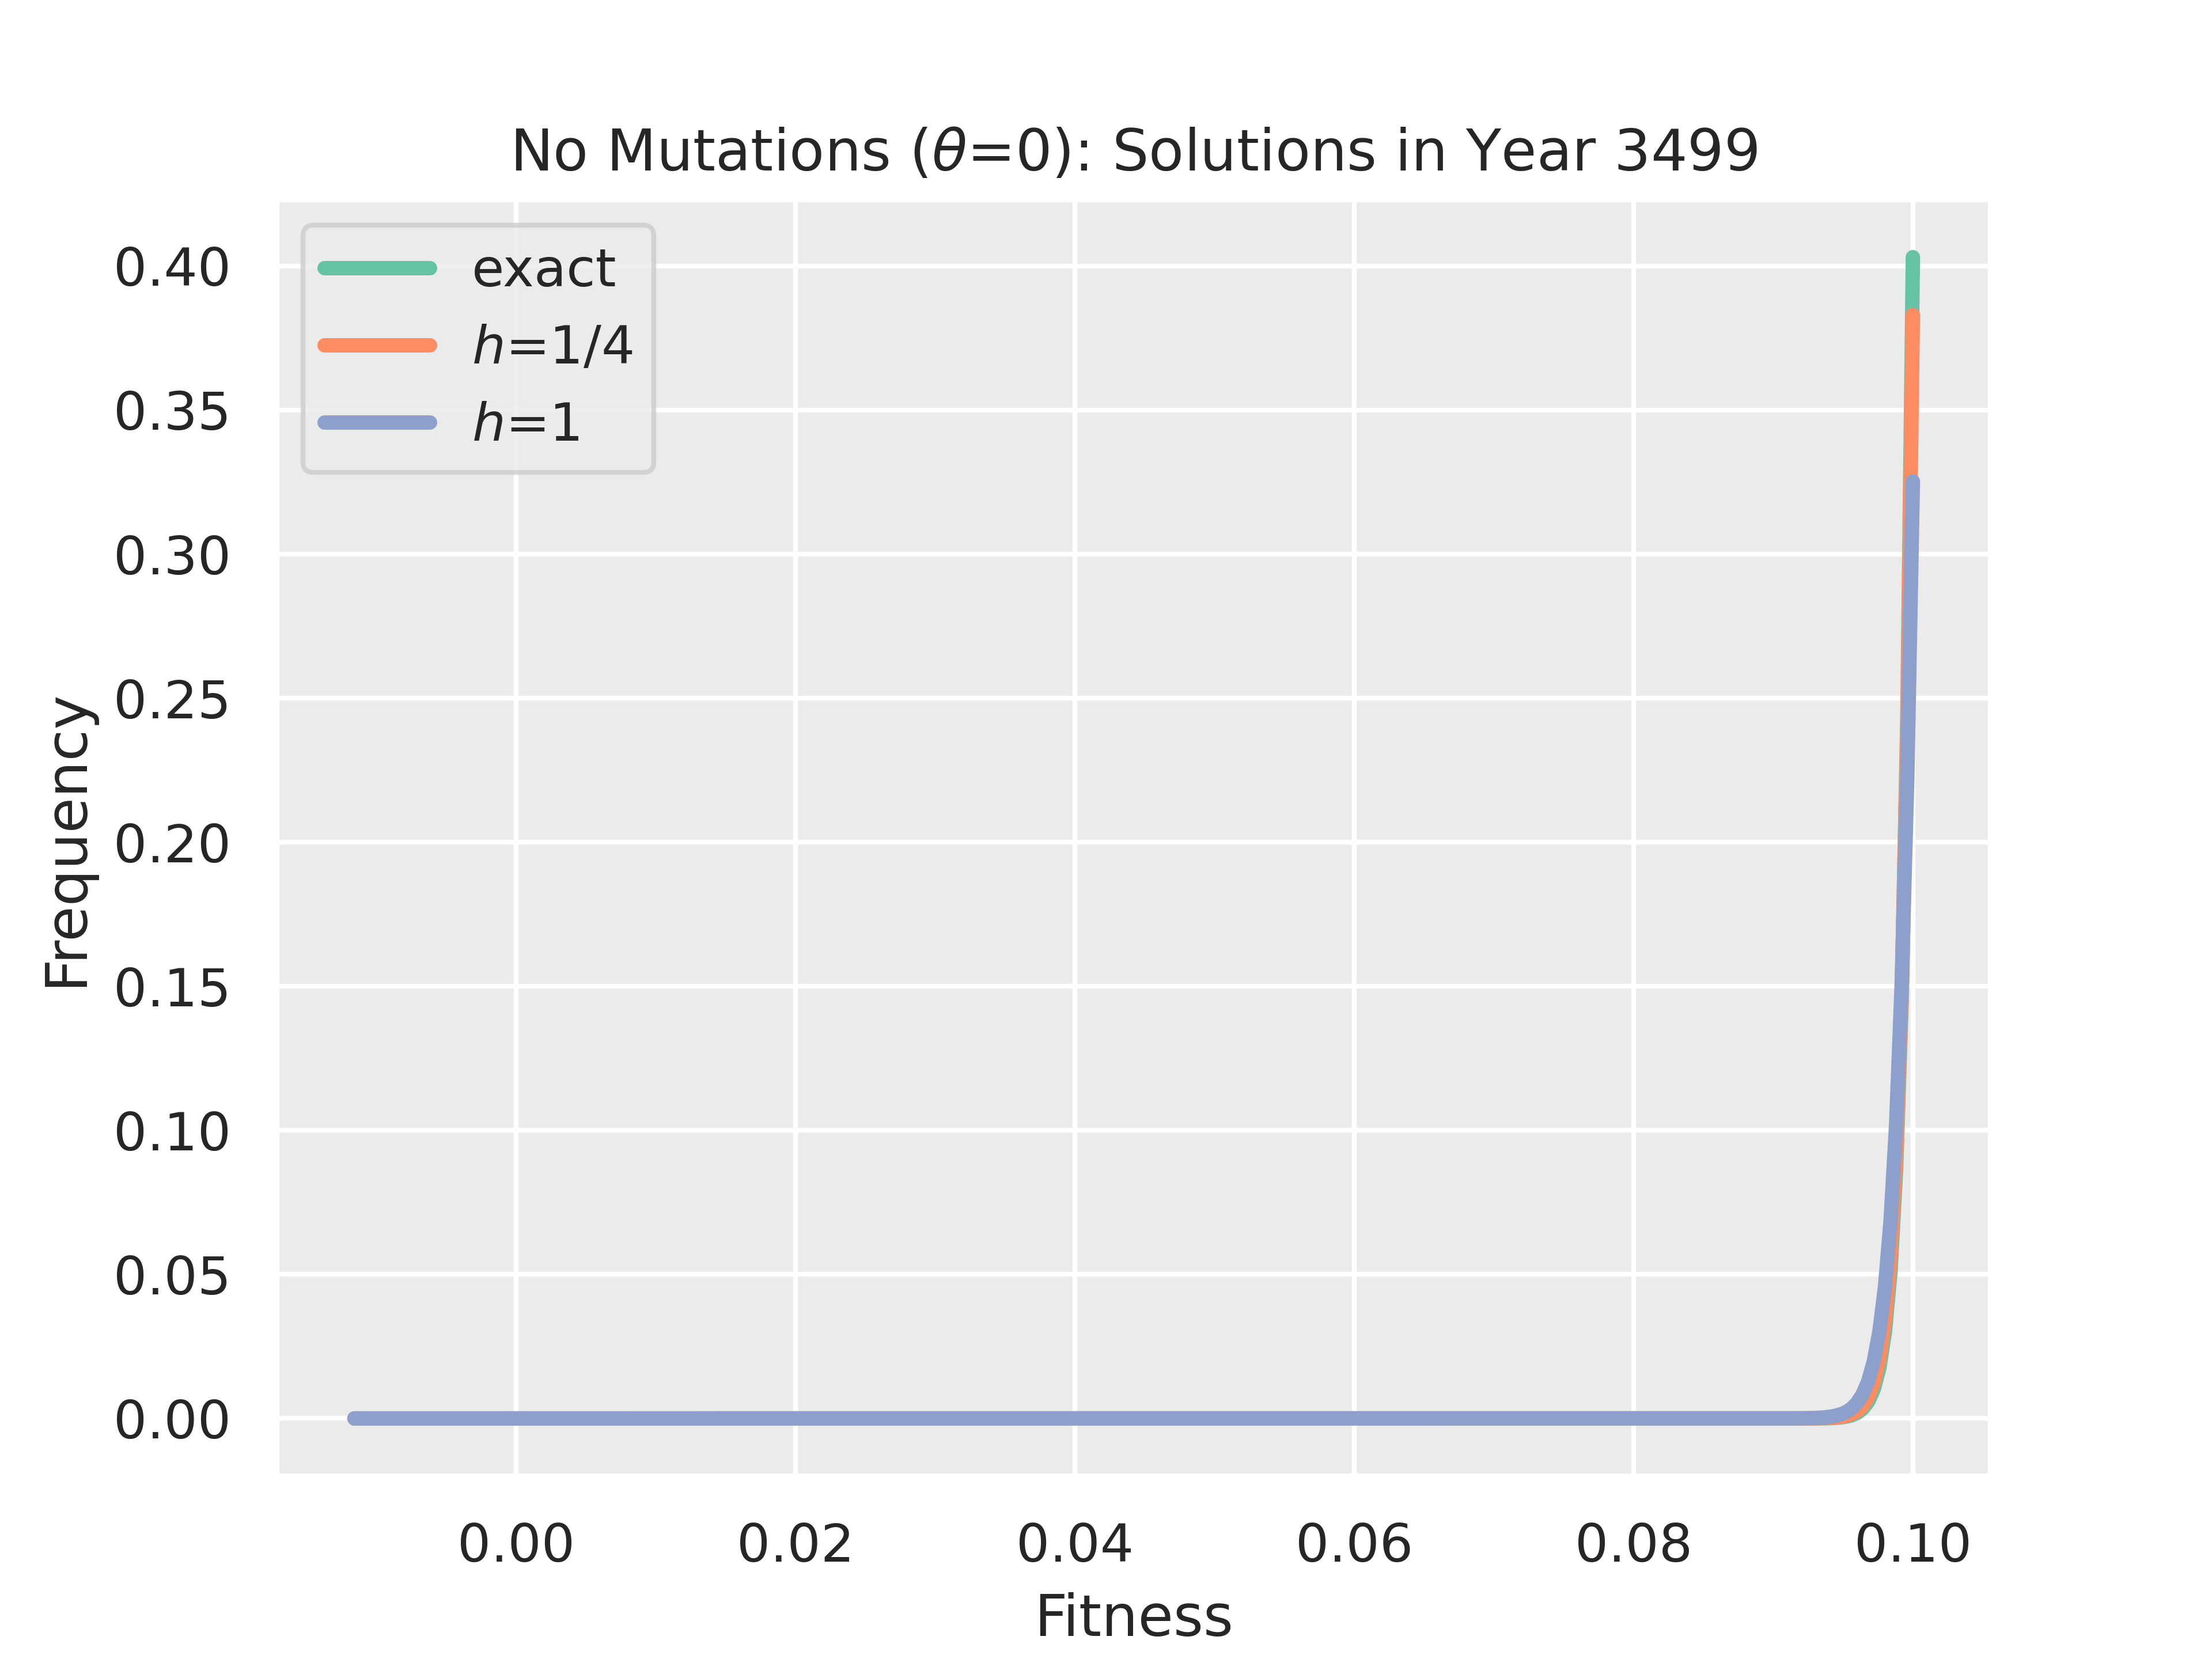

In [29]:
def run_no_mutations(n_epochs=3499, theta=0, h='1/8'):
    
    P0, m, delta = basener_init(501, m_lim=[-0.05, 0.15])
    P0[P0 < theta] = 0.0
    P0 /= sum(P0)
    pos = P0 > 0
    m = m[pos]
    P0 = P0[pos]
    W = np.eye(len(P0)) * m
    assert all(W[np.diag_indices(len(W))] == m)
    close = Solver(W, P0, h=h, theta=theta)
    crude = Solver(W, P0, h='1', theta=theta)
    close(n_epochs)
    crude(n_epochs)
    exact = P0 * np.array([math.exp(n_epochs * x) for x in m])
    ax = add_curve(m, exact, theta, label='exact')
    for solver in [close, crude]:
        label = '$h$={}'.format(Fraction(solver.step_size))
        ax = add_curve(m, solver[-1], theta, ax, label=label)
    t = 'No Mutations ($\\theta$={}): Solutions in Year {}'
    ax.set_title(t.format(theta, n_epochs))
    ax.legend(loc='upper left', frameon=True)
    save_and_display(ax.get_figure(), 'tmp.png')
    return crude, close, exact, ax, m

CRUDE, CLOSE, EXACT, AX, M = run_no_mutations(3499, h='1/4', theta=0)

## Solutions for the case of Sanford's DFE

We compare solutions produced by identically initialized instances of class `Solver` and class `NaiveSolver`. As explained above, the classes differ only in implementation of the `_zero` method. There is exactly one mutation in each birth, i.e., $U = L = 1.$ The maximum fitness is $m_n = 0.15,$ and the weighting of beneficial mutational effects is $\gamma = 10^{-3}.$ Both solvers execute $2^{10} =1024$ integration steps per year. That is, the step size is $h = 1/1024.$

In [30]:
def plot_solution_comparison(solvers, captions, m, mid=325, lw=4):
    """
    Display solutions of two solvers in two subplots.
    """
    # Set up two subplots, one below the other. Plot solutions for the
    # good (poor) solver in the upper (lower) subplot.
    fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
    for ax, s, t in zip(axes, solvers, captions):
        bs_plot(s, m, mid, ax=ax, lw=lw)
        # ax.set_xlim(-0.102, 0.102)
        ax.set_xlim(-0.080, 0.080)
#        ax.legend(loc='upper left', fontsize='small', title=t,
#                  title_fontsize='small', frameon=False)
        ax.legend(loc='upper left', title=t,
                  frameon=FRAMEON)
    title = 'Solutions of the Modified Mutation-Selection Model'
    axes[0].set_title(title, size='large', pad=12)
    axes[0].set_xlabel(None)
    fig.tight_layout()
    save_and_display(fig, 'fig2.png')
    return fig, axes

In [31]:
%%time
def run_solvers(DFE, n_years=2500, h='1/1024', theta=1e-9):
    """
    Return identically initialized `Solver` and `NaiveSolver` instances.
    """
    n = DFE.k
    W = Derivative(DFE, n)
    m = W.b - 0.1
    P0, alt_m, alt_delta = basener_init(n, m[[0, -1]])
    solvers = [S(W(), P0, h, theta) for S in [Solver, NaiveSolver]]
    for s in solvers:
        s(n_years)
    return solvers, m

DFE = Sanford(501, gamma='1e-3', delta='5e-4')
#SOLVERS, FIT = run_solvers(DFE, 2500, h='1/1024', theta=1e-9)
SOLVERS, FIT = run_solvers(DFE, 2500, h='1/4', theta=1e-9)

CPU times: user 42.2 s, sys: 1.5 s, total: 43.7 s
Wall time: 11.4 s


### Plot solutions in selected years

Generate Figure 1 of the article, comparing solutions obtained with correct and incorrect derivative calculations.

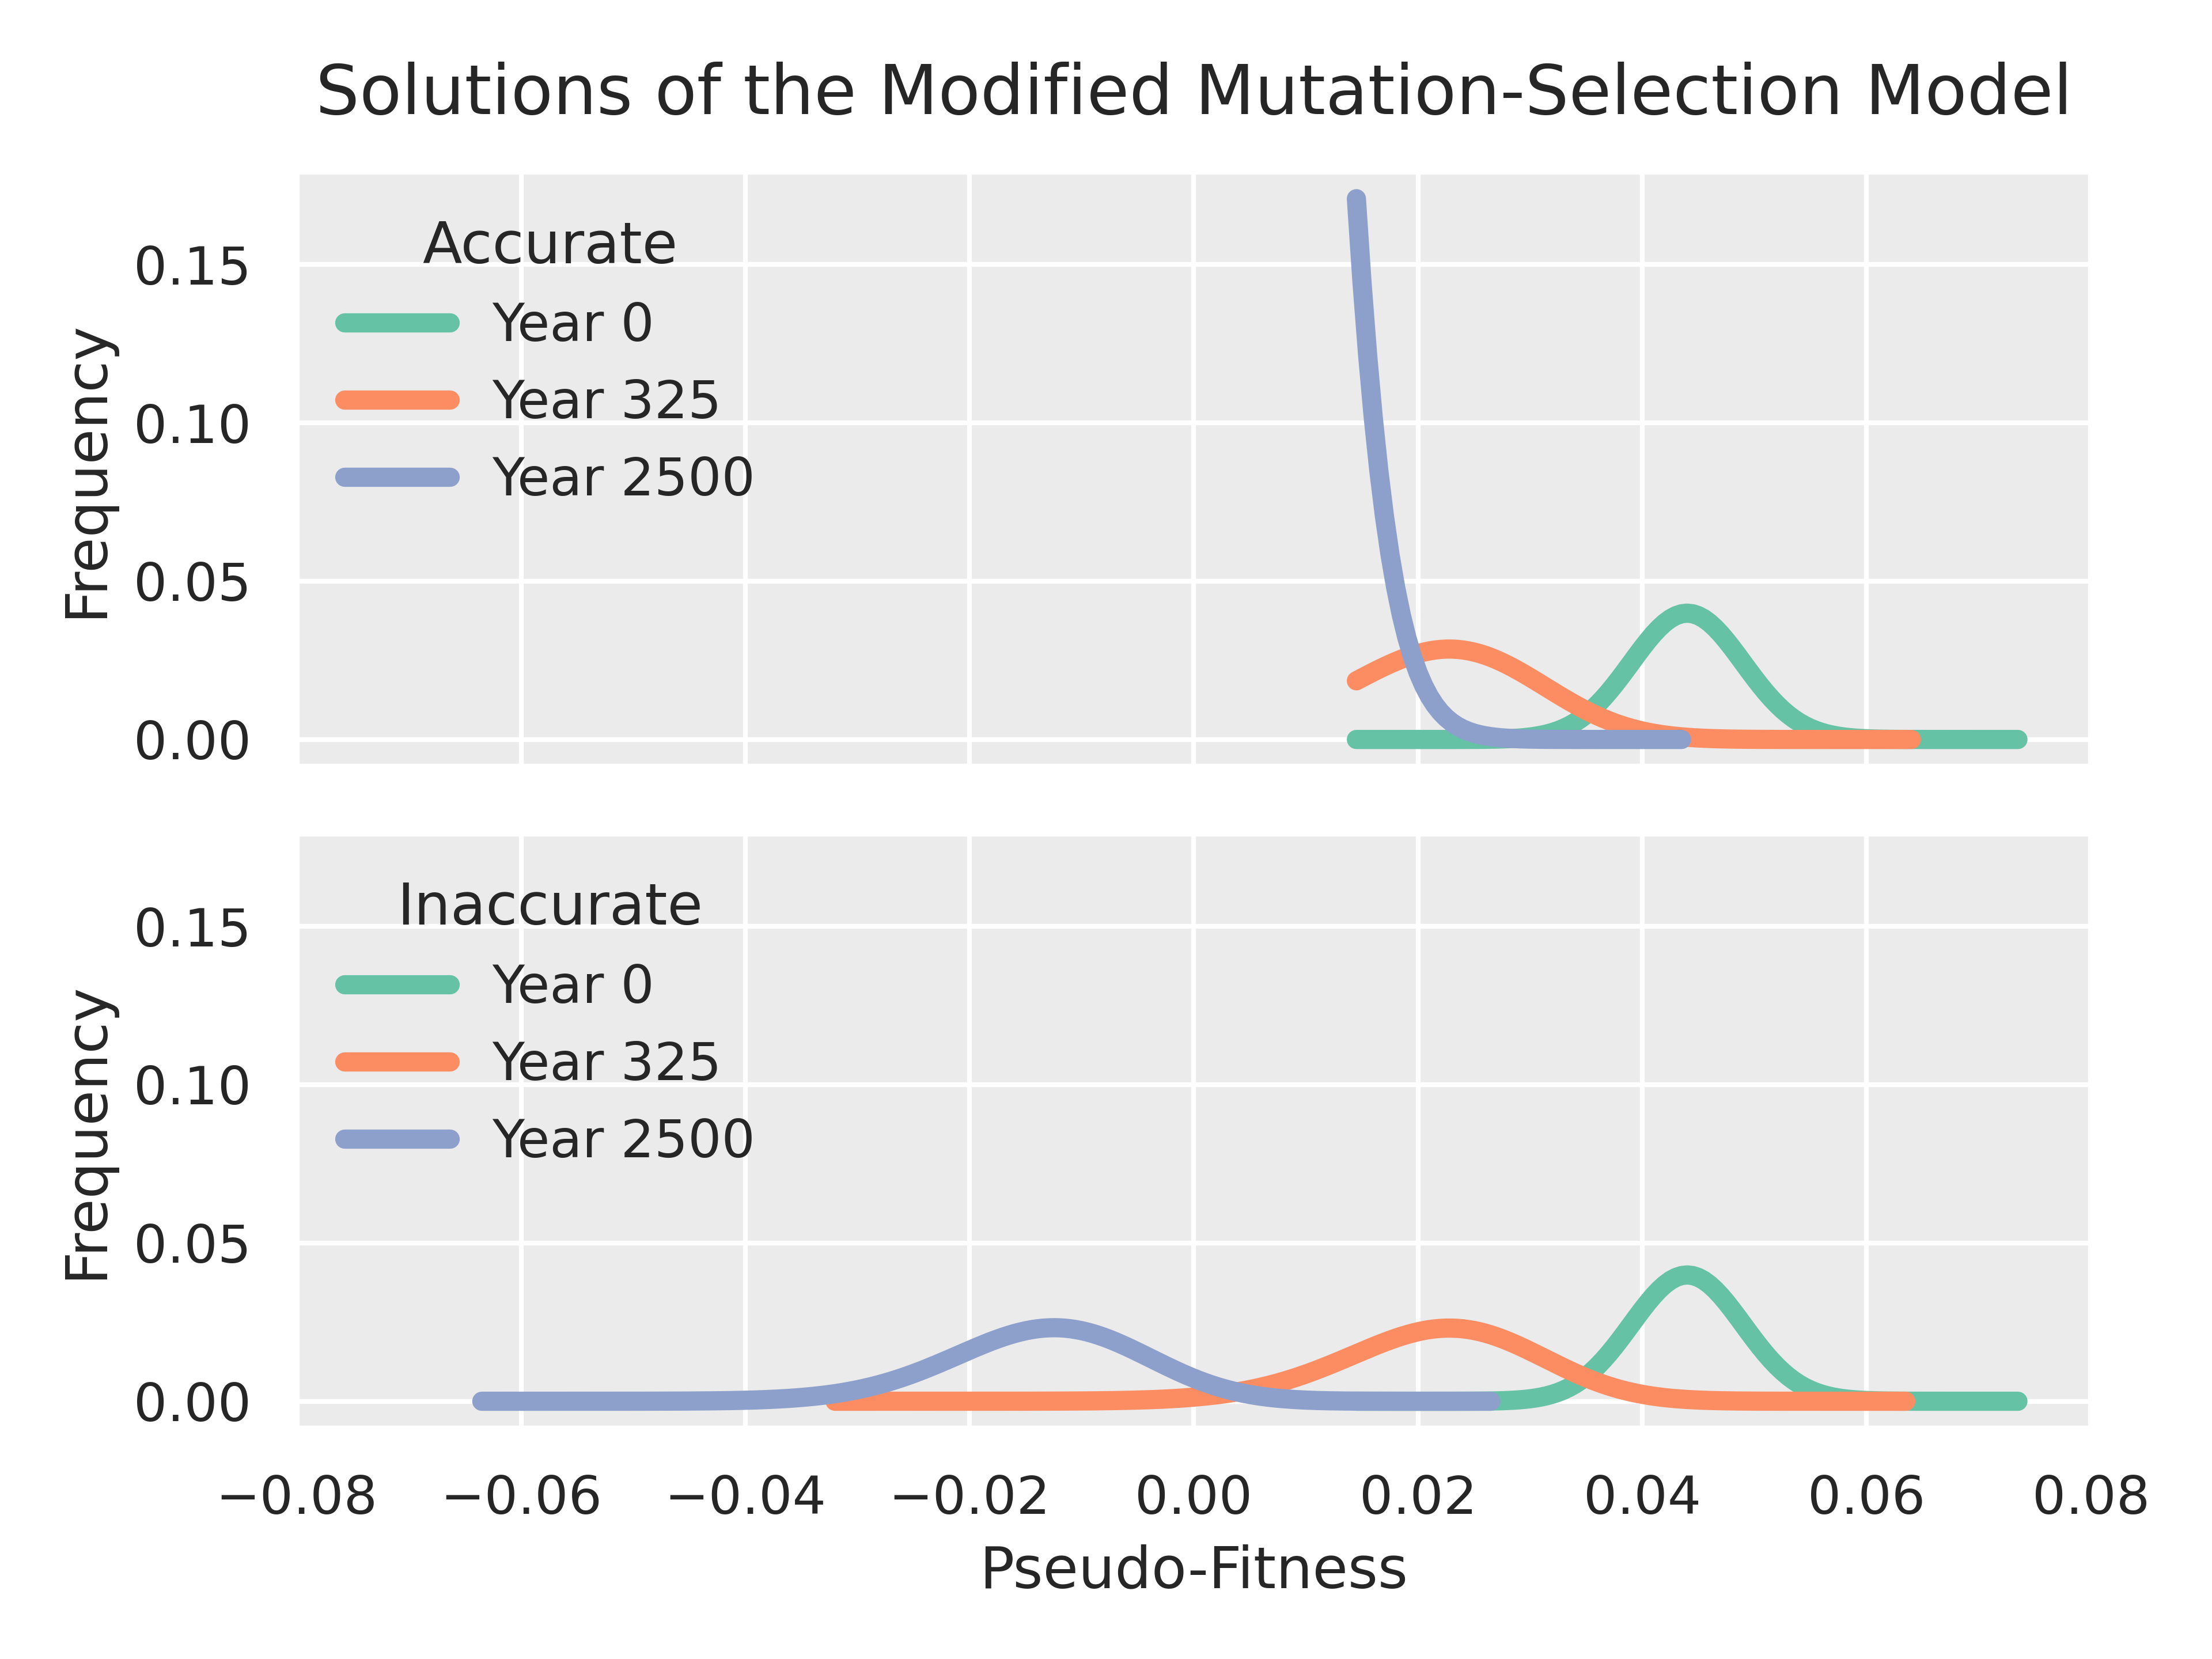

In [32]:
FIG = plot_solution_comparison(SOLVERS, ['Accurate', 'Inaccurate'], FIT)

# Errors and misreporting in B&S Section 5

### Severe error in Basener and Sanford's simulation

The probability $q_\gamma(0)$ that a mutation has no effect on fitness depends on the bin width $w.$ It does not depend on the mixture weight $\gamma$ (intuitively put, as the weight decreases from $0.5,$ the mass distributed over the upper half of the bin centered on zero decreases only as much as the mass distributed over the lower half increases). Nor does the value of $q_\gamma(0)$ depend on the limit $(K - 1) w$ on the magnitude of effect, provided that, as we assume in this subsection, the distribution is not normalized. The following code cell shows that when $w$ is set to $5 \times 10^{-4}\!,$ as in Section 5.4 of Basener and Sanford, the probability of zero effect is $.383.$ Decreasing the bin width by a factor of 10, we obtain a more sensible value of $.126.$

Inspecting the internal script of Basener's [simulation webpage](https://people.rit.edu/wfbsma/evolutionary%20dynamics/EvolutionaryModel.html), we find (in function `mutationProb`) that it treats zero mutational effect as a special case. Rather than calculate the mass distributed over the bin centered on zero, the script sets the value of $q_\gamma(0)$ to the probability of a minimally deleterious effect, $q_\gamma(-w),$ crudely approximated as $.219.$ Using a debugger to sum the script's calculated values of $q_\gamma(x)$ over all of the possible effects $x,$ we obtain a result of $.822.$ The fitness of the fittest type is not $0.150,$ as reported by Basener and Sanford, but instead $0.105$ or less. That is, summing the entries in the last column of array `MP` (corresponding to our matrix $M$⁠), we obtain an upper bound of $0.205$ for the birth-rate parameter of type $n$ (reached only when all frequencies are above threshold), and then subtract from it $d=0.1$ to obtain an upper bound on the fitness of the type. 